In [284]:
from pocket_cube.cube import Cube
from pocket_cube.cube import Move
import matplotlib.pyplot as pyplot

%matplotlib notebook
%matplotlib inline

# Creating a scrambled cube 

In [285]:
cube = Cube("R U' R' F' U")

## 2D Cube visualization 

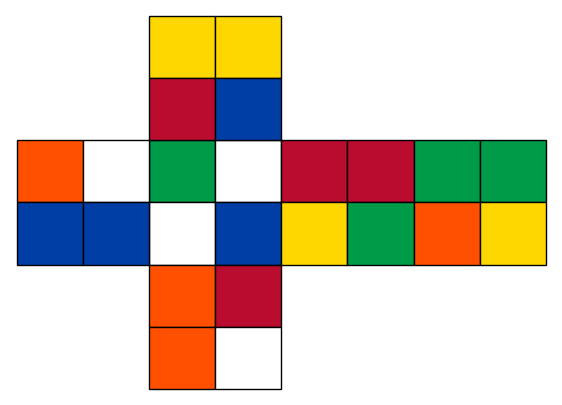

In [286]:
cube.render()

## Text representation 

In [287]:
cube.render_text()

  YY
  RB
OWGWRRGG
BBWBYGOY
  OR
  OW


## 3D Cube visualization

For an interactive view of the cube, don't forget to use `%matplotlib notebook`

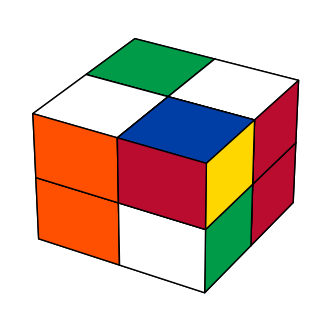

In [288]:
cube.render3D()

# Creating an unscrambled cube 

In [289]:
unscrambledCube = Cube(scrambled=False)

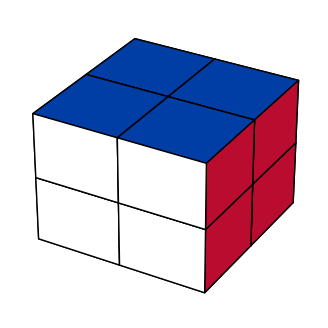

In [290]:
unscrambledCube.render3D()

## Applying moves on the cube 

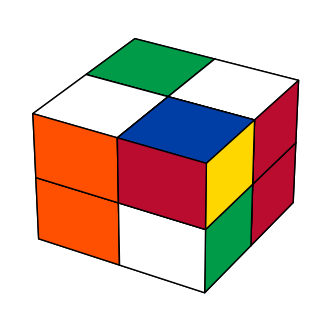

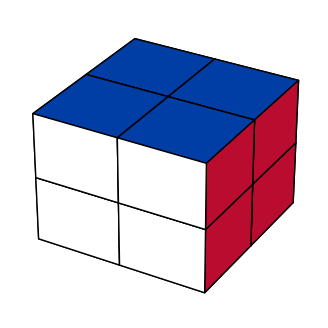

In [291]:
cube.render3D()
unscrambledCube.render3D()

In [292]:
import time

start = cube.clone_state()
final = unscrambledCube.clone_state()

is_final = lambda position: all(position.state == final)

print(is_final(cube))

False


In [293]:
def get_neighbours(_cube):
    l=[]
    
    cube_R=_cube.move(Move.R)
    l.append(cube_R)
    cube_Rp=_cube.move(Move.Rp)
    l.append(cube_Rp)
    cube_F=_cube.move(Move.F)
    l.append(cube_F)
    cube_Fp=_cube.move(Move.Fp)
    l.append(cube_Fp)
    cube_U=_cube.move(Move.U)
    l.append(cube_U)    
    cube_Up=_cube.move(Move.Up)
    l.append(cube_Up)
    return l

In [294]:
from heapq import heappop, heappush

priority_queue = []

In [295]:
def get_cost(m, n):
    if (m==n):
        return 0
    if((m==1 and n==3) or (m==3 and n==1)):
        return 2
    if((m==4 and n==5) or (m==5 and n==4)):
        return 2
    if((m==0 and n==2) or (m==2 and n==0)):
        return 2
    
    return 1

face_color = {
    0: 2, #"green",
    1: 0, #"blue",
    2: 5, #"white",
    3: 4, #"yellow",
    4: 3, #"orange",
    5: 1 #"red"
}

color_face = {
    0: 1,  # blue
    1: 5,  # red
    2: 0,  # green
    3: 4,  # orange
    4: 3,  # yellow
    5: 2   # white 
}

def count_neigh_colors(a):
    count = 0
    if (a.state[15] == a.state[13] and a.state[0]==a.state[2]):
        count+=1
    if (a.state[1]== a.state[3] and a.state[4]==a.state[6]):
        count+=1
    if (a.state[0]== a.state[1] and a.state[18]==a.state[19]):
        count+=1
    if (a.state[2]== a.state[3] and a.state[20]==a.state[21]):
        count+=1
    if (a.state[5]== a.state[7] and a.state[8]==a.state[10]):
        count+=1
    if (a.state[14] == a.state[15] and a.state[20]==a.state[22]):
        count+=1
    if (a.state[21] == a.state[23] and a.state[6]==a.state[7]):
        count+=1
    if (a.state[17] == a.state[19] and a.state[4]==a.state[5]):
        count+=1
    if (a.state[16] == a.state[18] and a.state[12]==a.state[13]):
        count+=1
    if (a.state[12] == a.state[14] and a.state[9]==a.state[11]):
        count+=1
    if (a.state[10] == a.state[11] and a.state[22]==a.state[23]):
        count+=1
    if (a.state[8] == a.state[9] and a.state[16]==a.state[17]):
        count+=1
            
    return count

def h1(a):
    sum = 0
    corners = 0
    for _, corner_val in a.get_corners().items():
        x = corner_val[0][0]
        y = corner_val[0][1]
        z = corner_val[0][2]
        face1 = corner_val[1][0]
        face2 = corner_val[1][1]
        face3 = corner_val[1][2]
        if a.state[x] != face_color[face1]:
            sum+=1
        if a.state[y] != face_color[face2]:
            sum+=1
        if a.state[z] != face_color[face3]:
            sum+=1
            
        if a.state[x] == face_color[face1] and a.state[y] == face_color[face2] and a.state[z] == face_color[face3]:
            corners+=1
    if corners >= 1 and sum <= 20 and count_neigh_colors(a) >= 2:
        return sum // 8
    else:
        return sum // 6

print(h1(unscrambledCube.move(Move.R)))
print(h1(unscrambledCube.move(Move.R).move(Move.R)))
print(h1(unscrambledCube.move(Move.R).move(Move.R).move(Move.Up)))
print(h1(unscrambledCube.move(Move.R).move(Move.Fp).move(Move.U)))
print(h1(Cube("R U' R' F' U")))
print(h1(Cube("F' R U R U F' U'")))
print(h1(Cube("F U U F' U' R R F' R")))
print(h1(Cube("U' R U' F' R F F U' F U U")))

print(h1(Cube("U' F R F'")))
print(h1(Cube("U' F R F")))
print(h1(Cube("F U' F' U R")))
print(h1(Cube("U' F R U' U'")))
print(h1(Cube("R U' F R U' F")))
print(h1(Cube("U' F R U' U' F R")))
print(h1(Cube("U' F' U R F U' R'")))
print(h1(Cube("F U U F' U' R R F' R")))
print(h1(Cube("F' R F F U' F U U R F")))
print(h1(Cube("U' R U' F F U' F U U R F")))
print(h1(Cube("U' R U' R F F U' F U U R F")))
print(h1(Cube("R U' R U' F U U R F' F' R R U'")))
print(h1(Cube("U' R U' F' R F' R U' F U U R F'")))
print(h1(Cube("R U' R U' F U' U' R F' F' R U' R F")))

1
1
1
2
1
2
3
2
1
2
2
2
3
3
2
3
3
2
2
2
3
2


In [296]:

def astar(start_cube, h):
    # Frontiera, ca listă (heap) de tupluri (cost-total-estimat, nod)
    frontier = []
    heappush(frontier, (0 + h(start_cube), start_cube))
    states_no = 1
    # Nodurile descoperite ca dicționar nod -> (părinte, cost-până-la-nod)
    discovered = {start_cube.hash(): (None, 0)}
    while frontier:
        s = heappop(frontier)
        (f, current_cube) = s
        if is_final(current_cube):
            print("Solutie gasita!")
            break
        for v in get_neighbours(current_cube):
            g_s = discovered[current_cube.hash()][1]
            if (v.hash() not in discovered or discovered[v.hash()][1] > g_s + 1):
                discovered[v.hash()] = (s,  1 + g_s)
                heappush(frontier, (g_s + 1 + h(v), v))
                states_no += 1

    # reconstruieste calea pana la solutie
    path = []
    while current_cube.hash() != start_cube.hash():
        if current_cube.hash() in discovered:
            path.append(current_cube)
            (s, cost) = discovered[current_cube.hash()]
            if s is not None:
                (cost, current_cube) = s
            else:
                break
        else:
            break
    
    path.append(start_cube)
    path.reverse()
    print(f"Numarul de stari descoperite: {states_no}")
    print("Drumul are {} mutări".format(len(path) - 1))
    path.reverse()
    # for c in path:
    #     c.render3D()
    
    return (len(path) - 1, states_no)

print("--- Testul 1")
cube = Cube("R U' R' F' U")
start_time = time.time()
(path_len, no_of_states) = astar(cube, h1)
end_time = time.time()
elapsed_time_seconds = end_time - start_time
print(f"Time: {elapsed_time_seconds}")
test1_astar = [elapsed_time_seconds, path_len, no_of_states]

print("--- Testul 2")
cube = Cube("F' R U R U F' U'")
start_time = time.time()
(path_len, no_of_states) = astar(cube, h1)
end_time = time.time()
elapsed_time_seconds = end_time - start_time
print(f"Time: {elapsed_time_seconds}")
test2_astar = [elapsed_time_seconds, path_len, no_of_states]

print("--- Testul 3")
cube = Cube("F U U F' U' R R F' R")
start_time = time.time()
(path_len, no_of_states) = astar(cube, h1)
end_time = time.time()
elapsed_time_seconds = end_time - start_time
print(f"Time: {elapsed_time_seconds}")
test3_astar = [elapsed_time_seconds, path_len, no_of_states]

print("--- Testul 4")
cube = Cube("U' R U' F' R F F U' F U U")
start_time = time.time()
(path_len, no_of_states) = astar(cube, h1)
end_time = time.time()
elapsed_time_seconds = end_time - start_time
print(f"Time: {elapsed_time_seconds}")
test4_astar = [elapsed_time_seconds, path_len, no_of_states]

--- Testul 1
Solutie gasita!
Numarul de stari descoperite: 646
Drumul are 5 mutări
Time: 0.1416323184967041
--- Testul 2
Solutie gasita!
Numarul de stari descoperite: 8281
Drumul are 7 mutări
Time: 1.7485485076904297
--- Testul 3
Solutie gasita!
Numarul de stari descoperite: 59968
Drumul are 9 mutări
Time: 14.68810248374939
--- Testul 4
Solutie gasita!
Numarul de stari descoperite: 808230
Drumul are 11 mutări
Time: 215.5261914730072


In [297]:
visited_from_start = {}
queue_from_start = []
visited_from_end = {}
queue_from_end = []

def bfs(start_cube, end_cube):
    visited_from_start[start_cube.hash()] = None
    queue_from_start.append(start_cube)
    visited_from_end[end_cube.hash()] = None
    queue_from_end.append(end_cube)
    
    states_no = 2
    found=False
    while queue_from_start and queue_from_end:
        current_cube_start = queue_from_start.pop(0)
        current_cube_end = queue_from_end.pop(0)
        
        l1 = get_neighbours(current_cube_start)
        l2 = get_neighbours(current_cube_end)
        
        for v in l1:
            if v.hash() not in visited_from_start:
                states_no += 1
                visited_from_start[v.hash()]=current_cube_start
                queue_from_start.append(v)
                if v.hash() in visited_from_end:
                    common = v.clone()
                    found = True
                    break
        if found:
            break
        for v in l2:
            if v.hash() not in visited_from_end:
                states_no += 1
                visited_from_end[v.hash()]=current_cube_end
                queue_from_end.append(v)
                if v.hash() in visited_from_start:
                    common = v.clone()
                    found = True
                    break
        if found:
            break
        
    if found:
        print("Solutie gasita!")
        print(f"Numarul de stari descoperite: {states_no}")
    else:
        print("Solutie negasita...")
        print(f"Numarul de stari descoperite: {states_no}")
        
    # reconstruieste calea pana la solutie
    path = []
    current_cube = common.clone()
    while current_cube.hash() != start_cube.hash():
        if current_cube.hash() in visited_from_start:
            path.append(current_cube)
            if visited_from_start[current_cube.hash()] is not None:
                current_cube = visited_from_start[current_cube.hash()]
            else:
                break
        else:
            break
            
    path.append(start_cube)
    path.reverse()
    
    current_cube = common.clone()
    while current_cube.hash() != end_cube.hash():
        if current_cube.hash() in visited_from_end:
            path.append(current_cube)
            if visited_from_end[current_cube.hash()] is not None:
                current_cube = visited_from_end[current_cube.hash()]
            else:
                break
        else:
            break
            
    path.append(end_cube)
  
    path.reverse()
    print("Drumul are {} mutări".format(len(path) - 1))
    # for c in path:
    #     c.render3D()
  
    return (len(path) - 1, states_no)

print("--- Testul 1")
cube = Cube("R U' R' F' U")
start_time = time.time()
(path_len, no_of_states) = bfs(cube, unscrambledCube)
end_time = time.time()
elapsed_time_seconds = end_time - start_time
print(f"Time: {elapsed_time_seconds}")
test1_bfs = [elapsed_time_seconds, path_len, no_of_states]

print("--- Testul 2")
cube = Cube("F' R U R U F' U'")
start_time = time.time()
(path_len, no_of_states) = bfs(cube, unscrambledCube)
end_time = time.time()
elapsed_time_seconds = end_time - start_time
print(f"Time: {elapsed_time_seconds}")
test2_bfs = [elapsed_time_seconds, path_len, no_of_states] 

print("--- Testul 3")
cube = Cube("F U U F' U' R R F' R")
start_time = time.time()
(path_len, no_of_states) = bfs(cube, unscrambledCube)
end_time = time.time()
elapsed_time_seconds = end_time - start_time
print(f"Time: {elapsed_time_seconds}")
test3_bfs = [elapsed_time_seconds, path_len, no_of_states] 

print("--- Testul 4")
cube = Cube("U' R U' F' R F F U' F U U")
start_time = time.time()
(path_len, no_of_states) = bfs(cube, unscrambledCube)
end_time = time.time()
elapsed_time_seconds = end_time - start_time
print(f"Time: {elapsed_time_seconds}")
test4_bfs = [elapsed_time_seconds, path_len, no_of_states]        

--- Testul 1
Solutie gasita!
Numarul de stari descoperite: 110
Drumul are 6 mutări
Time: 0.021466970443725586
--- Testul 2
Solutie gasita!
Numarul de stari descoperite: 181
Drumul are 7 mutări
Time: 0.025304079055786133
--- Testul 3
Solutie gasita!
Numarul de stari descoperite: 58
Drumul are 9 mutări
Time: 0.006867647171020508
--- Testul 4
Solutie gasita!
Numarul de stari descoperite: 94
Drumul are 9 mutări
Time: 0.010216951370239258


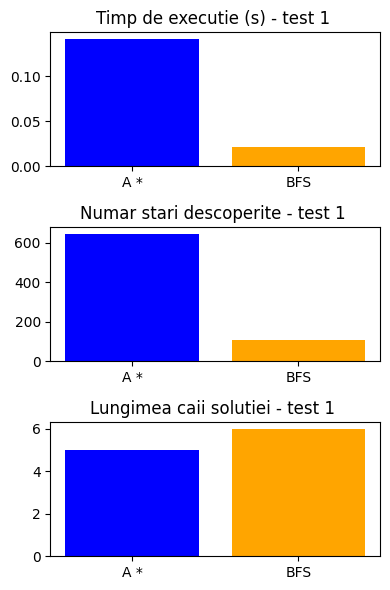

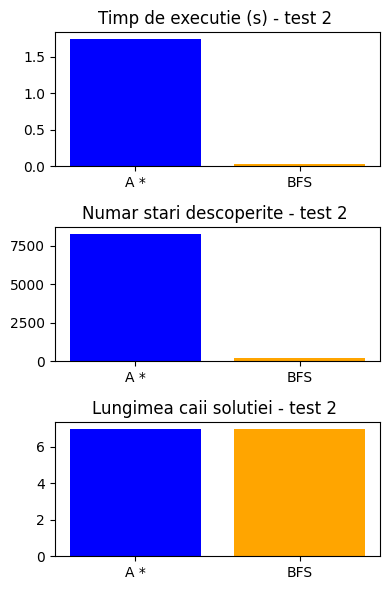

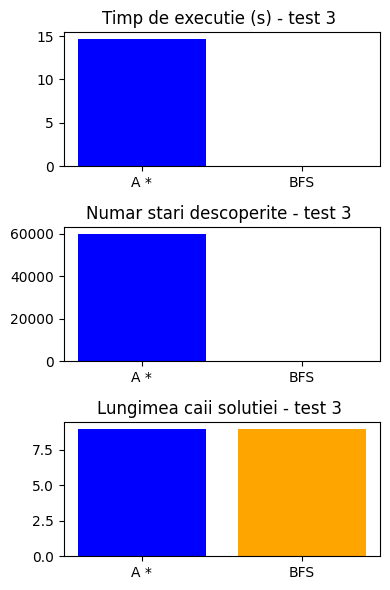

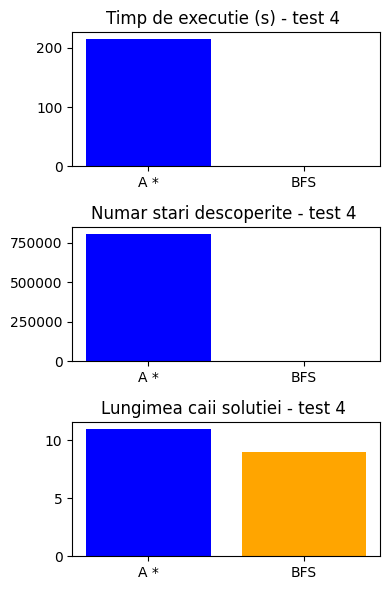

In [298]:
import matplotlib.pyplot as plt
import numpy as np

def print_chart(test_no, alg1, alg2, test_alg_1, test_alg_2, best_found_solutions = None, best_c = None, best_h = None, budget = None):
    algoritmi = [alg1, alg2]
    timp_executie = [test_alg_1[0], test_alg_2[0]]
    numar_stari = [test_alg_1[2], test_alg_2[2]]
    lungime_cale = [test_alg_1[1], test_alg_2[1]]

    if alg1 != "MCTS" and alg2 == "MCTS":
        mcts_str = f"  buget: {budget}  h: {best_h.__name__}  c: {best_c}  found_sols: {best_found_solutions}"
    else:
        mcts_str = ""
    fig, axs = plt.subplots(3, 1, figsize=(4, 6))

    axs[0].bar(algoritmi, timp_executie, color=['blue', 'orange'])
    axs[0].set_title(f"Timp de executie (s) - test {test_no} {mcts_str}")

    axs[1].bar(algoritmi, numar_stari, color=['blue', 'orange'])
    axs[1].set_title(f"Numar stari descoperite - test {test_no} {mcts_str}")

    axs[2].bar(algoritmi, lungime_cale, color=['blue', 'orange'])
    axs[2].set_title(f"Lungimea caii solutiei - test {test_no} {mcts_str}")

    plt.tight_layout()
    plt.show()
    
print_chart(1, "A *", "BFS", test1_astar, test1_bfs)
print_chart(2, "A *", "BFS", test2_astar, test2_bfs)
print_chart(3, "A *", "BFS", test3_astar, test3_bfs)
print_chart(4, "A *", "BFS", test4_astar, test4_bfs)

In [299]:
from random import choice

def get_available_actions(_cube):
    h = _cube.hash()
    l=[(Move.R, h), (Move.Rp, h), (Move.F, h), 
       (Move.Fp, h), (Move.U, h), (Move.Up, h)]
    
    return l

print(get_available_actions(cube))

[(<Move.R: 0>, '521252101210333445030445'), (<Move.Rp: 3>, '521252101210333445030445'), (<Move.F: 1>, '521252101210333445030445'), (<Move.Fp: 4>, '521252101210333445030445'), (<Move.U: 2>, '521252101210333445030445'), (<Move.Up: 5>, '521252101210333445030445')]


In [300]:
def apply_action(current_cube, action):
    return current_cube.move(action[0])

In [301]:
# Constante

N = 'N'
Q = 'Q'
PARENT = 'parent'
ACTIONS = 'actions'

def print_tree(tree, indent = 0):
    if not tree:
        return
    tab = "".join(" " * indent)
    print("%sN = %d, Q = %f" % (tab, tree[N], tree[Q]))
    print(tree[PARENT])
    for a in tree[ACTIONS]:
        print(f"{tab} {a} ==> ")
        print_tree(tree[ACTIONS][a], indent + 3)

In [302]:
# Funcție ce întoarce un nod nou,
# eventual copilul unui nod dat ca argument
def init_node(parent):
    return {N: 0, Q: 0, PARENT: parent, ACTIONS: {}}

In [303]:
from math import sqrt, log

CP = 1.0 / sqrt(2.0)

# Funcție ce alege o acțiune dintr-un nod
def select_action(node, c = CP):
    # TODO <2>
    # Se caută acțiunea a care maximizează expresia:
    # Q_a / N_a  +  c * sqrt(2 * log(N_node) / N_a)
    N_node = node[N]
    max = -1
    
    for action, next in node[ACTIONS].items():
        score = next[Q] / next[N] + c * sqrt(2 * log(N_node) / next[N])

        if score > max:
            max = score
            best_action = action

    return best_action

In [304]:
# Algoritmul MCTS (UCT)
#  state0 - starea pentru care trebuie aleasă o acțiune
#  budget - numărul de iterații permis
#  tree - un arbore din explorările anterioare

def h2(a):
    sum = 0
    for i in range(24):
        if a.state[i] != a.goal_state[i]:
            sum += 1
    if sum<=16:
        return sum // 8
    else:
        if sum <= 18:
            return sum // 6
        else:
            return sum // 4

print(h2(unscrambledCube.move(Move.R)))
print(h2(unscrambledCube.move(Move.R).move(Move.R)))
print(h2(unscrambledCube.move(Move.R).move(Move.R).move(Move.Up)))
print(h2(unscrambledCube.move(Move.R).move(Move.Fp).move(Move.U)))
print(h2(Cube("R U' R' F' U")))
print(h2(Cube("F' R U R U F' U'")))
print(h2(Cube("F U U F' U' R R F' R")))
print(h2(Cube("U' R U' F' R F F U' F U U")))
    
def mcts(start_cube, budget, tree, h, c):
    # arborele de start este un nod gol
    
    tree = init_node(None)
    states_no = 0

    for _ in range(budget):
        # Punctul de start al simulării va fi rădăcina de start
        current_cube = start_cube.clone()
        node = tree
        
        # Coborâm în arbore până când ajungem la o stare finală
        # sau la un nod cu acțiuni neexplorate.
        # Variabilele current_cube și node se 'mută' împreună.
        while (not is_final(current_cube)
            and all(action in node[ACTIONS] for action in get_available_actions(current_cube))):
            new_action = select_action(node, c)
            current_cube = apply_action(current_cube, new_action)
            node = node[ACTIONS][new_action]
        
        # Dacă am ajuns într-un nod care nu este final și din care nu s-au
        # `încercat` toate acțiunile, construim un nod nou.
        if not is_final(current_cube):
            for action in get_available_actions(current_cube):
                if action not in node[ACTIONS]:
                    new_action = action
                    break
            states_no += 1
            current_cube = apply_action(current_cube, new_action)
            node = init_node(node)
            node[PARENT][ACTIONS][new_action] = node

        # Se simulează o desfășurare a jocului până la ajungerea într-o
        # starea finală. Se evaluează recompensa în acea stare.
        done = 0
        max = -1
        while not is_final(current_cube):
            r = h(current_cube)
            if r > max:
                max = r
            current_cube = apply_action(current_cube, choice(get_available_actions(current_cube)))
            if done == 15:
                break
            done += 1

        if is_final(current_cube):
            reward = 200
        else:
            reward = 100-r

        # Se actualizează toate nodurile de la node către rădăcină:
        #  - se incrementează valoarea N din fiecare nod
        #  - se adaugă recompensa la valoarea Q
        current_node = node
        while current_node:
            current_node[N] += 1
            current_node[Q] += reward
            current_node = current_node[PARENT]

    # Reconstruieste calea pana la solutie
    path = []
    current_cube=start_cube.clone()
    path.append(current_cube)
    while(not is_final(current_cube) and len(tree[ACTIONS])!=0):
        max = -1
        best_action_in_path = None
        for action in tree[ACTIONS]:
            if tree[ACTIONS][action][Q]>max:
                max=tree[ACTIONS][action][Q]
                best_action_in_path = action
        path.append(current_cube)
        tree = tree[ACTIONS][best_action_in_path]
        current_cube=apply_action(current_cube, best_action_in_path)
        
    return (is_final(current_cube), states_no, len(path) - 1)


1
1
1
2
1
3
3
2


In [305]:
def play_game(budget, h, c, cube):
    (final, states, path_len) = mcts(cube.clone(), budget, None, h, c)
    
    return (final, states, path_len)

best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

def test_mcts(test_no, c, h, budget):
    global avg_found_solutions, avg_path, avg_time, avg_states_no, avg_unfound_solutions
    sum_found_solutions = 0
    sum_time = 0
    sum_path = 0
    sum_states_no = 0

    print(f"--- Testul {test_no} c: {c} h: {h.__name__} buget: {budget}")
    for _ in range(20):
        if test_no == 1:
            _cube = Cube("R U' R' F' U")
        if test_no == 2:
            _cube = Cube("F' R U R U F' U'")
        if test_no == 3:
            _cube = Cube("F U U F' U' R R F' R")
        if test_no == 4:
            _cube = Cube("U' R U' F' R F F U' F U U")
                    
        start_time = time.time()
        (final, states, path_len) = play_game(budget, h, c, _cube)
        end_time = time.time()
        elapsed_time_seconds = end_time - start_time
        if final: 
            sum_found_solutions += 1
        sum_time += elapsed_time_seconds
        sum_path += path_len
        sum_states_no += states
        
    avg_found_solutions = sum_found_solutions
    avg_path = sum_path / 20
    avg_states_no = sum_states_no / 20
    avg_time = sum_time / 20

    print(f"avg_time: {avg_time} found_sol: {avg_found_solutions} unfound_sol: {20 - avg_found_solutions} avg_path_len: {avg_path} avg_states_no: {avg_states_no}")

def get_best(c, h, budget, test_no):
    test_mcts(test_no, c, h, budget)
    global best_c, best_h, best_found_solutions, best_path, best_states_no, best_time, avg_found_solutions

    if avg_found_solutions > best_found_solutions:
        best_found_solutions = avg_found_solutions
        best_c = c
        best_h = h
        best_path = avg_path
        best_states_no = avg_states_no
        best_time = avg_time

--- Testul 1 c: 0.5 h: h1 buget: 1000
avg_time: 1.3576330423355103 found_sol: 5 unfound_sol: 15 avg_path_len: 6.3 avg_states_no: 976.5
--- Testul 1 c: 0.1 h: h1 buget: 1000
avg_time: 1.5367717504501344 found_sol: 2 unfound_sol: 18 avg_path_len: 11.05 avg_states_no: 946.65
--- Testul 1 c: 0.5 h: h2 buget: 1000
avg_time: 1.2926902294158935 found_sol: 3 unfound_sol: 17 avg_path_len: 7.65 avg_states_no: 920.1
--- Testul 1 c: 0.1 h: h2 buget: 1000
avg_time: 1.4756569027900697 found_sol: 2 unfound_sol: 18 avg_path_len: 12.65 avg_states_no: 947.85
>>> best_c: 0.5 best_h <function h1 at 0x7f50b246c160> best_time: 1.3576330423355103 found_sol: 5 unfound_sol: 15 best_path_len: 6.3 best_states_no: 976.5


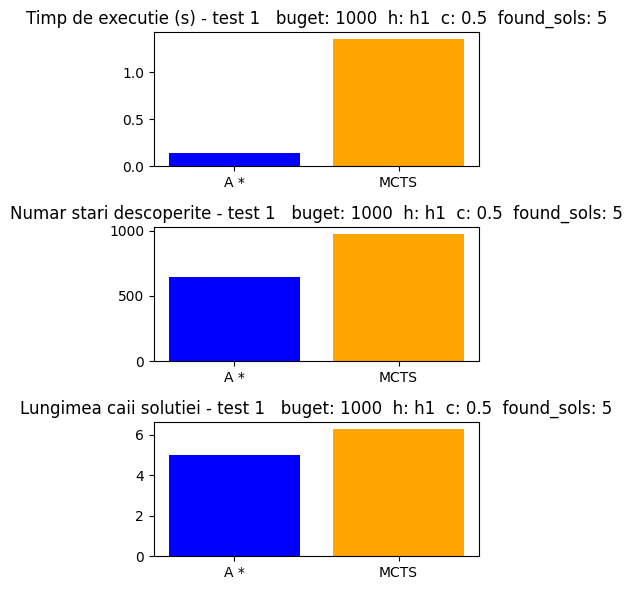

--- Testul 1 c: 0.5 h: h1 buget: 5000
avg_time: 4.700516390800476 found_sol: 17 unfound_sol: 3 avg_path_len: 6.6 avg_states_no: 2516.3
--- Testul 1 c: 0.1 h: h1 buget: 5000
avg_time: 8.143893909454345 found_sol: 7 unfound_sol: 13 avg_path_len: 17.4 avg_states_no: 4000.4
--- Testul 1 c: 0.5 h: h2 buget: 5000
avg_time: 4.696292388439178 found_sol: 16 unfound_sol: 4 avg_path_len: 8.0 avg_states_no: 2543.8
--- Testul 1 c: 0.1 h: h2 buget: 5000
avg_time: 8.336047649383545 found_sol: 3 unfound_sol: 17 avg_path_len: 19.05 avg_states_no: 4586.65
>>> best_c: 0.5 best_h <function h1 at 0x7f50b246c160> best_time: 4.700516390800476 found_sol: 17 unfound_sol: 3 best_path_len: 6.6 best_states_no: 2516.3


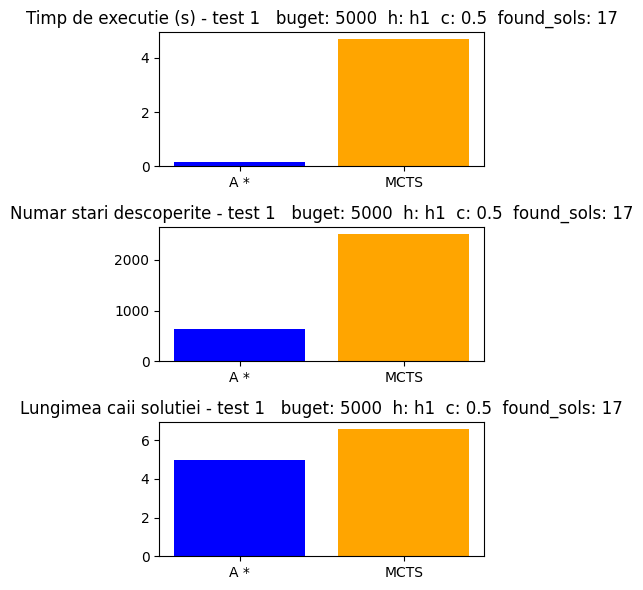

--- Testul 1 c: 0.5 h: h1 buget: 10000
avg_time: 7.994819676876068 found_sol: 18 unfound_sol: 2 avg_path_len: 7.05 avg_states_no: 3426.75
--- Testul 1 c: 0.1 h: h1 buget: 10000
avg_time: 15.252940797805786 found_sol: 13 unfound_sol: 7 avg_path_len: 18.05 avg_states_no: 6335.55
--- Testul 1 c: 0.5 h: h2 buget: 10000
avg_time: 9.483635354042054 found_sol: 16 unfound_sol: 4 avg_path_len: 9.5 avg_states_no: 4531.95
--- Testul 1 c: 0.1 h: h2 buget: 10000
avg_time: 18.23689423799515 found_sol: 3 unfound_sol: 17 avg_path_len: 24.95 avg_states_no: 8720.05
>>> best_c: 0.5 best_h <function h1 at 0x7f50b246c160> best_time: 7.994819676876068 found_sol: 18 unfound_sol: 2 best_path_len: 7.05 best_states_no: 3426.75


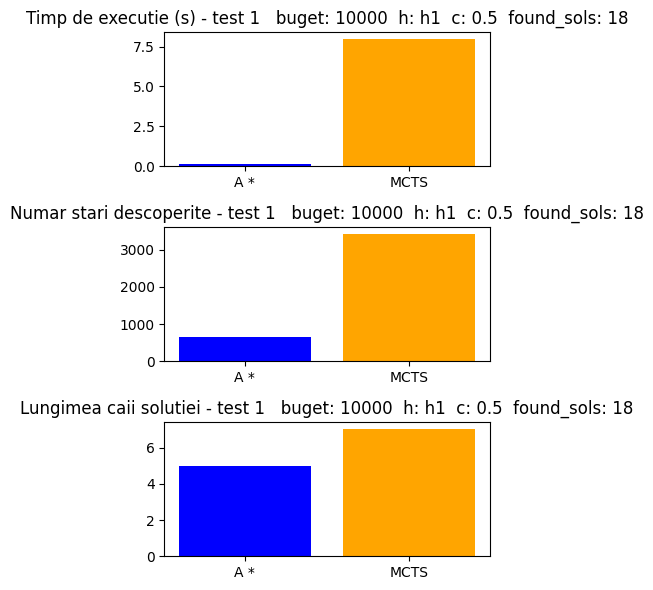

--- Testul 1 c: 0.5 h: h1 buget: 20000
avg_time: 11.93686796426773 found_sol: 20 unfound_sol: 0 avg_path_len: 6.4 avg_states_no: 3417.65
--- Testul 1 c: 0.1 h: h1 buget: 20000
avg_time: 24.335841369628906 found_sol: 16 unfound_sol: 4 avg_path_len: 15.95 avg_states_no: 7318.75
--- Testul 1 c: 0.5 h: h2 buget: 20000
avg_time: 16.834757685661316 found_sol: 17 unfound_sol: 3 avg_path_len: 8.4 avg_states_no: 7224.95
--- Testul 1 c: 0.1 h: h2 buget: 20000
avg_time: 33.10196369886398 found_sol: 9 unfound_sol: 11 avg_path_len: 24.05 avg_states_no: 12528.75
>>> best_c: 0.5 best_h <function h1 at 0x7f50b246c160> best_time: 11.93686796426773 found_sol: 20 unfound_sol: 0 best_path_len: 6.4 best_states_no: 3417.65


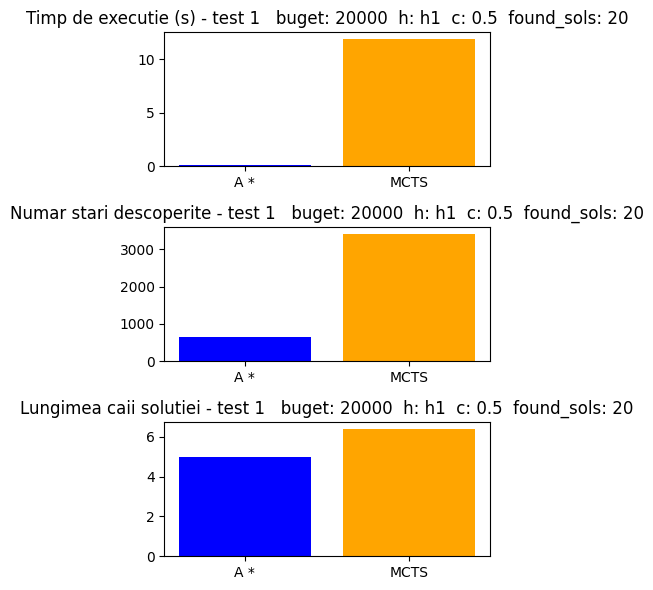

In [306]:
# Test 1
# buget 1000
get_best(0.5, h1, 1000, 1)
get_best(0.1, h1, 1000, 1)
get_best(0.5, h2, 1000, 1)
get_best(0.1, h2, 1000, 1)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test1_buget1_mcts = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h]  
print_chart(1, "A *", "MCTS", test1_astar, test1_buget1_mcts, best_found_solutions, best_c, best_h, 1000)

best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# buget 5000
get_best(0.5, h1, 5000, 1)
get_best(0.1, h1, 5000, 1)
get_best(0.5, h2, 5000, 1)
get_best(0.1, h2, 5000, 1)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test1_buget2_mcts = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h]  
print_chart(1, "A *", "MCTS", test1_astar, test1_buget2_mcts, best_found_solutions, best_c, best_h, 5000)

best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# buget 10000
get_best(0.5, h1, 10000, 1)
get_best(0.1, h1, 10000, 1)
get_best(0.5, h2, 10000, 1)
get_best(0.1, h2, 10000, 1)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test1_buget3_mcts = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h]  
print_chart(1, "A *", "MCTS", test1_astar, test1_buget3_mcts, best_found_solutions, best_c, best_h, 10000)

best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# buget 20000
get_best(0.5, h1, 20000, 1)
get_best(0.1, h1, 20000, 1)
get_best(0.5, h2, 20000, 1)
get_best(0.1, h2, 20000, 1)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test1_buget4_mcts = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h]  

print_chart(1, "A *", "MCTS", test1_astar, test1_buget4_mcts, best_found_solutions, best_c, best_h, 20000)

--- Testul 2 c: 0.5 h: h1 buget: 1000
avg_time: 1.3535722851753236 found_sol: 1 unfound_sol: 19 avg_path_len: 5.9 avg_states_no: 971.85
--- Testul 2 c: 0.1 h: h1 buget: 1000
avg_time: 1.5676931262016296 found_sol: 0 unfound_sol: 20 avg_path_len: 11.5 avg_states_no: 1000.0
--- Testul 2 c: 0.5 h: h2 buget: 1000
avg_time: 1.3310063242912293 found_sol: 0 unfound_sol: 20 avg_path_len: 7.65 avg_states_no: 1000.0
--- Testul 2 c: 0.1 h: h2 buget: 1000
avg_time: 1.5071412920951843 found_sol: 0 unfound_sol: 20 avg_path_len: 13.55 avg_states_no: 1000.0
>>> best_c: 0.5 best_h <function h1 at 0x7f50b246c160> best_time: 1.3535722851753236 found_sol: 1 unfound_sol: 19 best_path_len: 5.9 best_states_no: 971.85


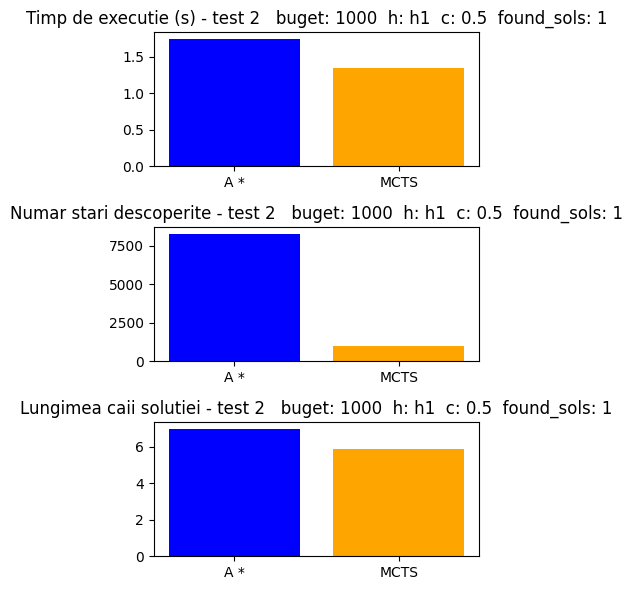

--- Testul 2 c: 0.5 h: h1 buget: 5000
avg_time: 6.9309035539627075 found_sol: 3 unfound_sol: 17 avg_path_len: 7.45 avg_states_no: 4598.05
--- Testul 2 c: 0.1 h: h1 buget: 5000
avg_time: 8.811194598674774 found_sol: 4 unfound_sol: 16 avg_path_len: 17.4 avg_states_no: 4320.3
--- Testul 2 c: 0.5 h: h2 buget: 5000
avg_time: 6.847486138343811 found_sol: 4 unfound_sol: 16 avg_path_len: 10.25 avg_states_no: 4434.35
--- Testul 2 c: 0.1 h: h2 buget: 5000
avg_time: 9.4478990316391 found_sol: 3 unfound_sol: 17 avg_path_len: 22.65 avg_states_no: 4591.1
>>> best_c: 0.1 best_h <function h1 at 0x7f50b246c160> best_time: 8.811194598674774 found_sol: 4 unfound_sol: 16 best_path_len: 17.4 best_states_no: 4320.3


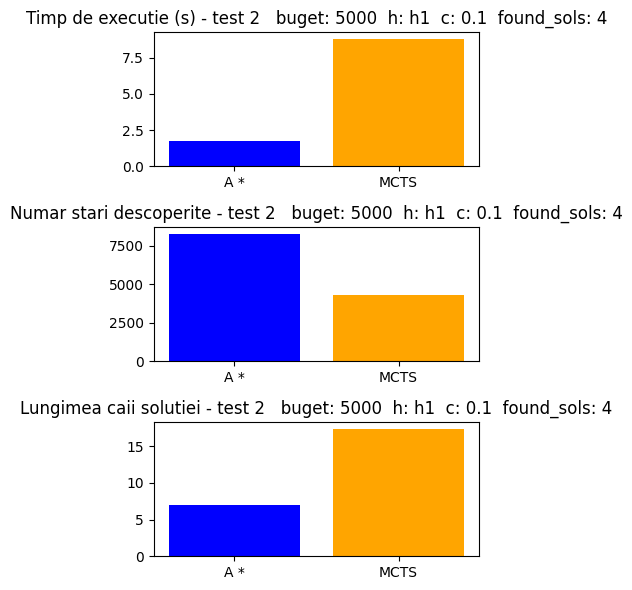

--- Testul 2 c: 0.5 h: h1 buget: 10000
avg_time: 13.994259417057037 found_sol: 6 unfound_sol: 14 avg_path_len: 8.65 avg_states_no: 8317.65
--- Testul 2 c: 0.1 h: h1 buget: 10000
avg_time: 18.733185625076295 found_sol: 5 unfound_sol: 15 avg_path_len: 20.4 avg_states_no: 8496.0
--- Testul 2 c: 0.5 h: h2 buget: 10000
avg_time: 13.485209476947784 found_sol: 10 unfound_sol: 10 avg_path_len: 11.9 avg_states_no: 7309.55
--- Testul 2 c: 0.1 h: h2 buget: 10000
avg_time: 20.72402368783951 found_sol: 1 unfound_sol: 19 avg_path_len: 27.1 avg_states_no: 9796.85
>>> best_c: 0.5 best_h <function h2 at 0x7f50b9314d30> best_time: 13.485209476947784 found_sol: 10 unfound_sol: 10 best_path_len: 11.9 best_states_no: 7309.55


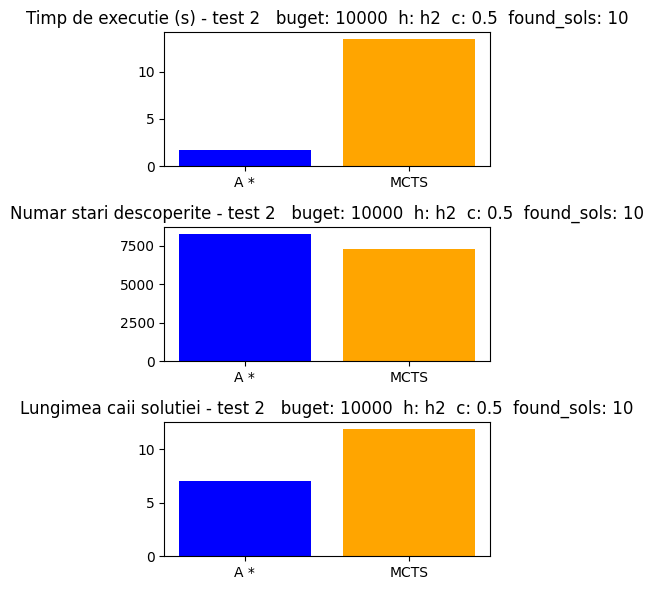

--- Testul 2 c: 0.5 h: h1 buget: 20000
avg_time: 20.97627991437912 found_sol: 14 unfound_sol: 6 avg_path_len: 9.25 avg_states_no: 10424.15
--- Testul 2 c: 0.1 h: h1 buget: 20000
avg_time: 34.74627692699433 found_sol: 7 unfound_sol: 13 avg_path_len: 22.5 avg_states_no: 14843.3
--- Testul 2 c: 0.5 h: h2 buget: 20000
avg_time: 21.806269693374634 found_sol: 18 unfound_sol: 2 avg_path_len: 11.95 avg_states_no: 9267.65
--- Testul 2 c: 0.1 h: h2 buget: 20000
avg_time: 42.271840119361876 found_sol: 7 unfound_sol: 13 avg_path_len: 29.6 avg_states_no: 14653.85
>>> best_c: 0.5 best_h <function h2 at 0x7f50b9314d30> best_time: 21.806269693374634 found_sol: 18 unfound_sol: 2 best_path_len: 11.95 best_states_no: 9267.65


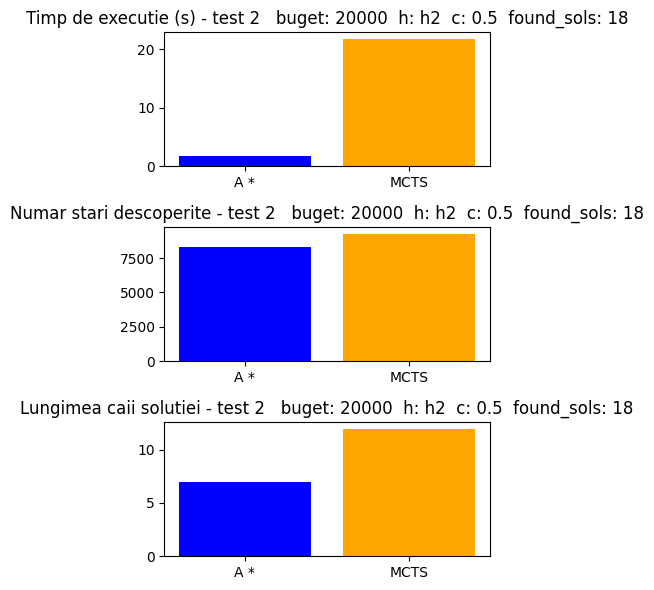

In [307]:
best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# Test 2
# buget 1000
get_best(0.5, h1, 1000, 2)
get_best(0.1, h1, 1000, 2)
get_best(0.5, h2, 1000, 2)
get_best(0.1, h2, 1000, 2)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test2_buget1_mcts = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h]  
print_chart(2, "A *", "MCTS", test2_astar, test2_buget1_mcts, best_found_solutions, best_c, best_h, 1000)

best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# buget 5000
get_best(0.5, h1, 5000, 2)
get_best(0.1, h1, 5000, 2)
get_best(0.5, h2, 5000, 2)
get_best(0.1, h2, 5000, 2)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test2_buget2_mcts = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h]  
print_chart(2, "A *", "MCTS", test2_astar, test2_buget2_mcts, best_found_solutions, best_c, best_h, 5000)

best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# buget 10000
get_best(0.5, h1, 10000, 2)
get_best(0.1, h1, 10000, 2)
get_best(0.5, h2, 10000, 2)
get_best(0.1, h2, 10000, 2)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test2_buget3_mcts = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h]  
print_chart(2, "A *", "MCTS", test2_astar, test2_buget3_mcts, best_found_solutions, best_c, best_h, 10000)

best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# buget 20000
get_best(0.5, h1, 20000, 2)
get_best(0.1, h1, 20000, 2)
get_best(0.5, h2, 20000, 2)
get_best(0.1, h2, 20000, 2)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test2_buget4_mcts = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h]  

print_chart(2, "A *", "MCTS", test2_astar, test2_buget4_mcts, best_found_solutions, best_c, best_h, 20000)


--- Testul 3 c: 0.5 h: h1 buget: 1000
avg_time: 1.3798252463340759 found_sol: 0 unfound_sol: 20 avg_path_len: 5.85 avg_states_no: 1000.0
--- Testul 3 c: 0.1 h: h1 buget: 1000
avg_time: 1.6129128694534303 found_sol: 0 unfound_sol: 20 avg_path_len: 11.8 avg_states_no: 1000.0
--- Testul 3 c: 0.5 h: h2 buget: 1000
avg_time: 1.3376767992973329 found_sol: 0 unfound_sol: 20 avg_path_len: 7.55 avg_states_no: 1000.0
--- Testul 3 c: 0.1 h: h2 buget: 1000
avg_time: 1.503269112110138 found_sol: 0 unfound_sol: 20 avg_path_len: 12.85 avg_states_no: 1000.0
>>> best_c: 0.5 best_h <function h1 at 0x7f50b246c160> best_time: 1.3798252463340759 found_sol: 0 unfound_sol: 20 best_path_len: 5.85 best_states_no: 1000.0


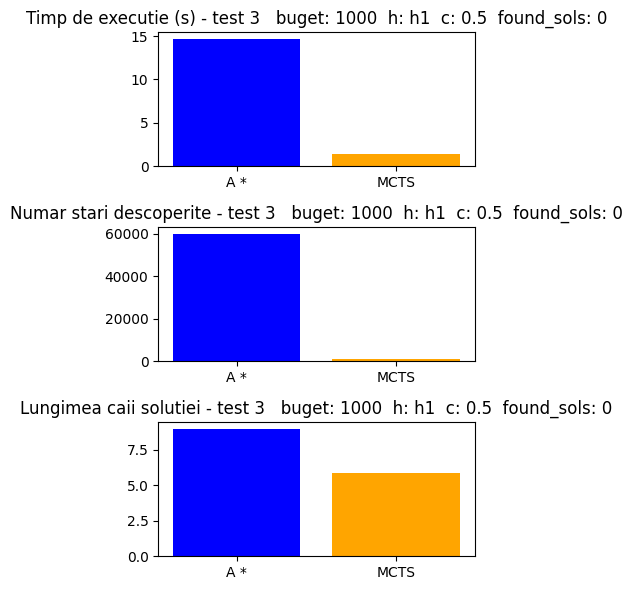

--- Testul 3 c: 0.5 h: h1 buget: 5000
avg_time: 7.227534878253937 found_sol: 0 unfound_sol: 20 avg_path_len: 7.1 avg_states_no: 5000.0
--- Testul 3 c: 0.1 h: h1 buget: 5000
avg_time: 8.763683259487152 found_sol: 2 unfound_sol: 18 avg_path_len: 17.85 avg_states_no: 4682.45
--- Testul 3 c: 0.5 h: h2 buget: 5000
avg_time: 7.096365225315094 found_sol: 0 unfound_sol: 20 avg_path_len: 9.85 avg_states_no: 5000.0
--- Testul 3 c: 0.1 h: h2 buget: 5000
avg_time: 8.688156604766846 found_sol: 2 unfound_sol: 18 avg_path_len: 21.45 avg_states_no: 4672.75
>>> best_c: 0.1 best_h <function h1 at 0x7f50b246c160> best_time: 8.763683259487152 found_sol: 2 unfound_sol: 18 best_path_len: 17.85 best_states_no: 4682.45


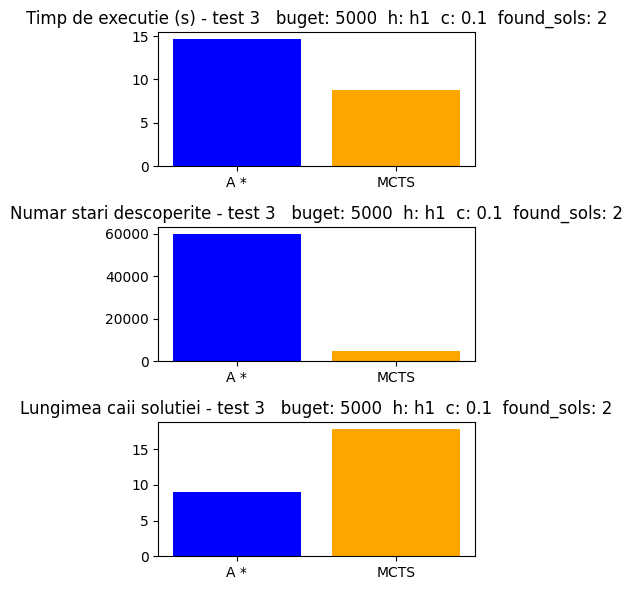

--- Testul 3 c: 0.5 h: h1 buget: 10000
avg_time: 14.806092131137849 found_sol: 0 unfound_sol: 20 avg_path_len: 7.95 avg_states_no: 10000.0
--- Testul 3 c: 0.1 h: h1 buget: 10000
avg_time: 19.37755674123764 found_sol: 1 unfound_sol: 19 avg_path_len: 22.1 avg_states_no: 9799.65
--- Testul 3 c: 0.5 h: h2 buget: 10000
avg_time: 14.500783860683441 found_sol: 0 unfound_sol: 20 avg_path_len: 11.0 avg_states_no: 10000.0
--- Testul 3 c: 0.1 h: h2 buget: 10000
avg_time: 20.377980840206146 found_sol: 1 unfound_sol: 19 avg_path_len: 27.0 avg_states_no: 9926.45
>>> best_c: 0.1 best_h <function h1 at 0x7f50b246c160> best_time: 19.37755674123764 found_sol: 1 unfound_sol: 19 best_path_len: 22.1 best_states_no: 9799.65


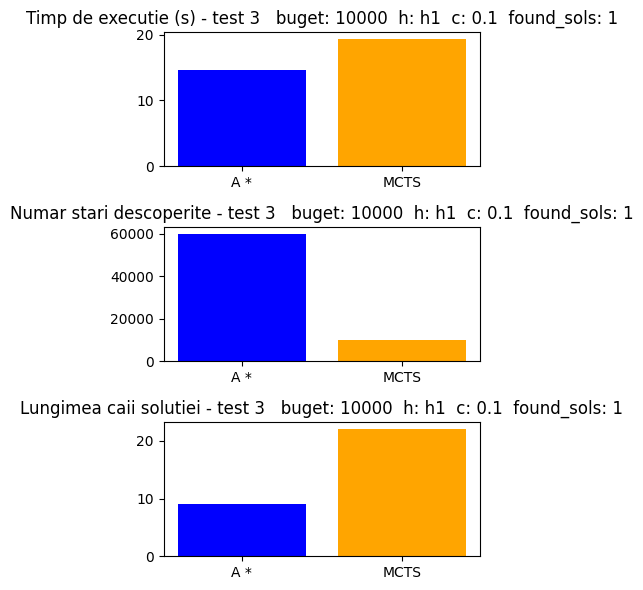

--- Testul 3 c: 0.5 h: h1 buget: 20000
avg_time: 28.891282844543458 found_sol: 3 unfound_sol: 17 avg_path_len: 9.45 avg_states_no: 18771.1
--- Testul 3 c: 0.1 h: h1 buget: 20000
avg_time: 40.14793064594269 found_sol: 3 unfound_sol: 17 avg_path_len: 25.05 avg_states_no: 18710.85
--- Testul 3 c: 0.5 h: h2 buget: 20000
avg_time: 29.150951075553895 found_sol: 2 unfound_sol: 18 avg_path_len: 12.2 avg_states_no: 18761.6
--- Testul 3 c: 0.1 h: h2 buget: 20000
avg_time: 43.21439900398254 found_sol: 4 unfound_sol: 16 avg_path_len: 30.9 avg_states_no: 17356.75
>>> best_c: 0.1 best_h <function h2 at 0x7f50b9314d30> best_time: 43.21439900398254 found_sol: 4 unfound_sol: 16 best_path_len: 30.9 best_states_no: 17356.75


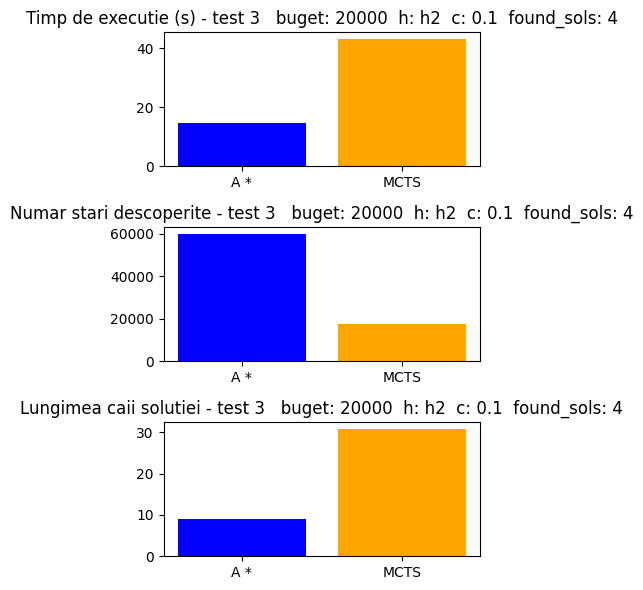

In [308]:
best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# Test 3
# buget 1000
get_best(0.5, h1, 1000, 3)
get_best(0.1, h1, 1000, 3)
get_best(0.5, h2, 1000, 3)
get_best(0.1, h2, 1000, 3)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test3_buget1_mcts = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h]  
print_chart(3, "A *", "MCTS", test3_astar, test3_buget1_mcts, best_found_solutions, best_c, best_h, 1000)

best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# buget 5000
get_best(0.5, h1, 5000, 3)
get_best(0.1, h1, 5000, 3)
get_best(0.5, h2, 5000, 3)
get_best(0.1, h2, 5000, 3)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test3_buget2_mcts = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h]  
print_chart(3, "A *", "MCTS", test3_astar, test3_buget2_mcts, best_found_solutions, best_c, best_h, 5000)

best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# buget 10000
get_best(0.5, h1, 10000, 3)
get_best(0.1, h1, 10000, 3)
get_best(0.5, h2, 10000, 3)
get_best(0.1, h2, 10000, 3)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test3_buget3_mcts = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h]  
print_chart(3, "A *", "MCTS", test3_astar, test3_buget3_mcts, best_found_solutions, best_c, best_h, 10000)

best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# buget 20000
get_best(0.5, h1, 20000, 3)
get_best(0.1, h1, 20000, 3)
get_best(0.5, h2, 20000, 3)
get_best(0.1, h2, 20000, 3)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test3_buget4_mcts = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h] 

print_chart(3, "A *", "MCTS", test3_astar, test3_buget4_mcts, best_found_solutions, best_c, best_h, 20000)


--- Testul 4 c: 0.5 h: h1 buget: 1000


avg_time: 1.3650189995765687 found_sol: 0 unfound_sol: 20 avg_path_len: 6.0 avg_states_no: 1000.0
--- Testul 4 c: 0.1 h: h1 buget: 1000
avg_time: 1.5879925727844237 found_sol: 0 unfound_sol: 20 avg_path_len: 12.3 avg_states_no: 1000.0
--- Testul 4 c: 0.5 h: h2 buget: 1000
avg_time: 1.3455970644950868 found_sol: 0 unfound_sol: 20 avg_path_len: 7.6 avg_states_no: 1000.0
--- Testul 4 c: 0.1 h: h2 buget: 1000
avg_time: 1.5189334511756898 found_sol: 0 unfound_sol: 20 avg_path_len: 14.1 avg_states_no: 1000.0
>>> best_c: 0.5 best_h <function h1 at 0x7f50b246c160> best_time: 1.3650189995765687 found_sol: 0 unfound_sol: 20 best_path_len: 6.0 best_states_no: 1000.0


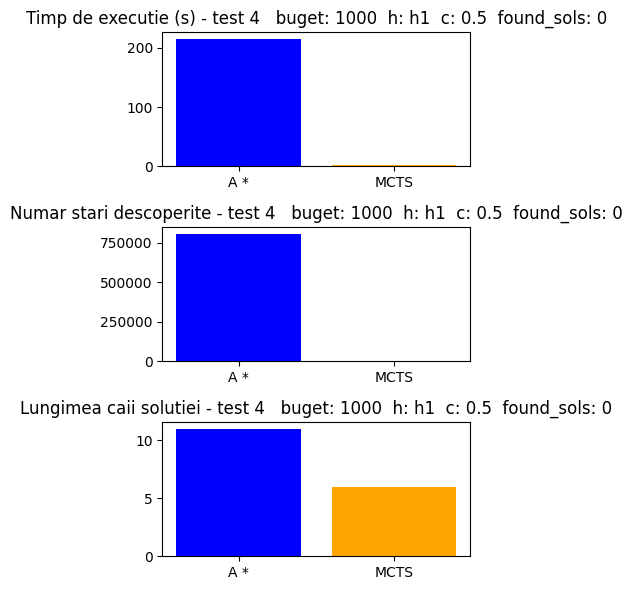

--- Testul 4 c: 0.5 h: h1 buget: 5000
avg_time: 7.174526333808899 found_sol: 0 unfound_sol: 20 avg_path_len: 7.2 avg_states_no: 5000.0
--- Testul 4 c: 0.1 h: h1 buget: 5000
avg_time: 9.249794602394104 found_sol: 0 unfound_sol: 20 avg_path_len: 19.35 avg_states_no: 5000.0
--- Testul 4 c: 0.5 h: h2 buget: 5000
avg_time: 7.210112071037292 found_sol: 0 unfound_sol: 20 avg_path_len: 10.0 avg_states_no: 5000.0
--- Testul 4 c: 0.1 h: h2 buget: 5000
avg_time: 9.51690719127655 found_sol: 0 unfound_sol: 20 avg_path_len: 23.8 avg_states_no: 5000.0
>>> best_c: 0.5 best_h <function h1 at 0x7f50b246c160> best_time: 7.174526333808899 found_sol: 0 unfound_sol: 20 best_path_len: 7.2 best_states_no: 5000.0


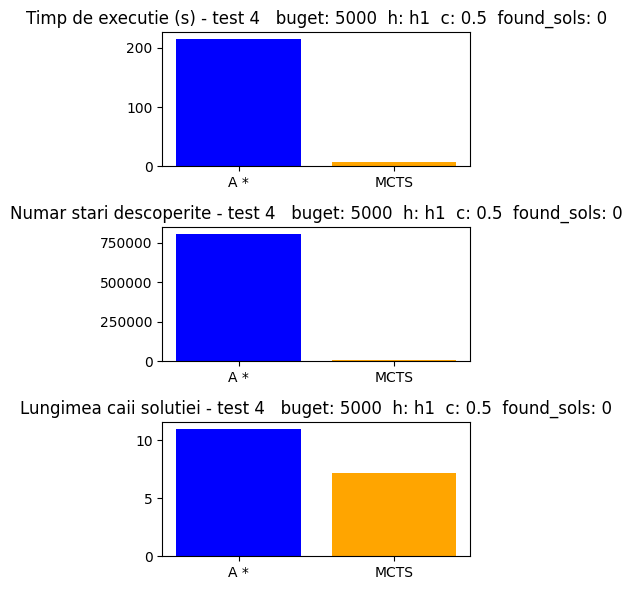

--- Testul 4 c: 0.5 h: h1 buget: 10000
avg_time: 14.614875948429107 found_sol: 0 unfound_sol: 20 avg_path_len: 7.85 avg_states_no: 10000.0
--- Testul 4 c: 0.1 h: h1 buget: 10000
avg_time: 20.753475999832155 found_sol: 0 unfound_sol: 20 avg_path_len: 23.9 avg_states_no: 10000.0
--- Testul 4 c: 0.5 h: h2 buget: 10000
avg_time: 16.198969376087188 found_sol: 0 unfound_sol: 20 avg_path_len: 11.8 avg_states_no: 10000.0
--- Testul 4 c: 0.1 h: h2 buget: 10000
avg_time: 20.70028523206711 found_sol: 0 unfound_sol: 20 avg_path_len: 27.2 avg_states_no: 10000.0
>>> best_c: 0.5 best_h <function h1 at 0x7f50b246c160> best_time: 14.614875948429107 found_sol: 0 unfound_sol: 20 best_path_len: 7.85 best_states_no: 10000.0


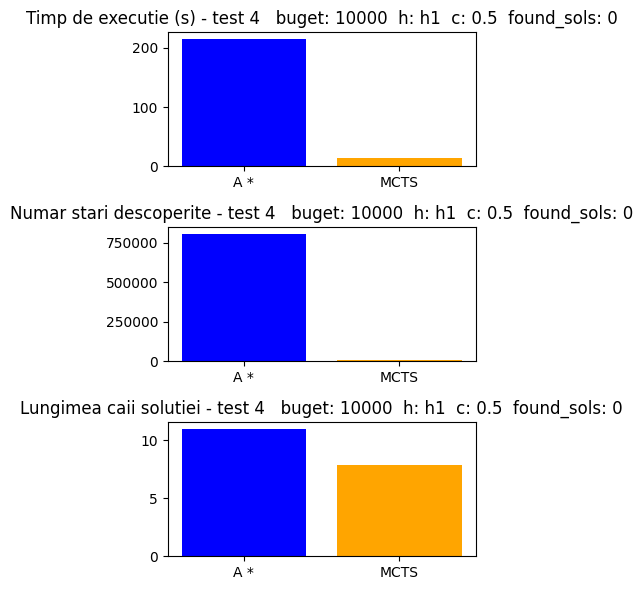

--- Testul 4 c: 0.5 h: h1 buget: 20000
avg_time: 30.271887469291688 found_sol: 0 unfound_sol: 20 avg_path_len: 8.45 avg_states_no: 20000.0
--- Testul 4 c: 0.1 h: h1 buget: 20000
avg_time: 46.4881630063057 found_sol: 0 unfound_sol: 20 avg_path_len: 30.15 avg_states_no: 20000.0
--- Testul 4 c: 0.5 h: h2 buget: 20000
avg_time: 31.74297163486481 found_sol: 0 unfound_sol: 20 avg_path_len: 13.35 avg_states_no: 20000.0
--- Testul 4 c: 0.1 h: h2 buget: 20000
avg_time: 47.697155964374545 found_sol: 1 unfound_sol: 19 avg_path_len: 34.15 avg_states_no: 19048.45
>>> best_c: 0.1 best_h <function h2 at 0x7f50b9314d30> best_time: 47.697155964374545 found_sol: 1 unfound_sol: 19 best_path_len: 34.15 best_states_no: 19048.45


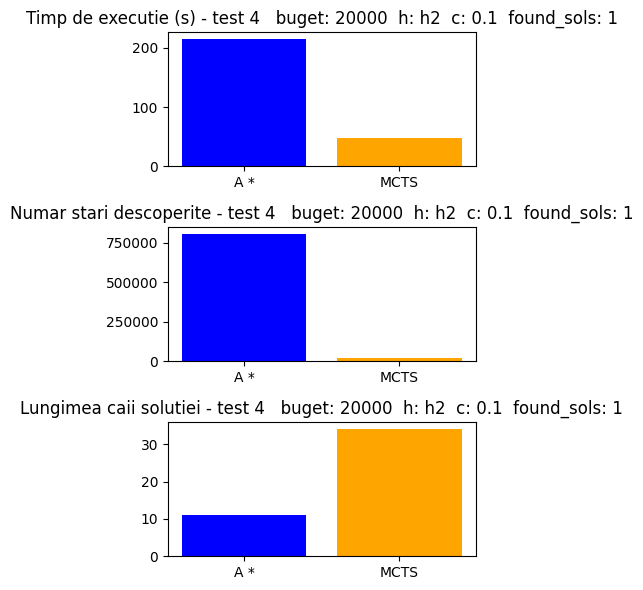

In [309]:
best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# Test 4
# buget 1000
get_best(0.5, h1, 1000, 4)
get_best(0.1, h1, 1000, 4)
get_best(0.5, h2, 1000, 4)
get_best(0.1, h2, 1000, 4)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test4_buget1_mcts = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h] 
print_chart(4, "A *", "MCTS", test4_astar, test4_buget1_mcts, best_found_solutions, best_c, best_h, 1000)

best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# buget 5000
get_best(0.5, h1, 5000, 4)
get_best(0.1, h1, 5000, 4)
get_best(0.5, h2, 5000, 4)
get_best(0.1, h2, 5000, 4)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test4_buget2_mcts = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h] 
print_chart(4, "A *", "MCTS", test4_astar, test4_buget2_mcts, best_found_solutions, best_c, best_h, 5000)

best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# buget 10000
get_best(0.5, h1, 10000, 4)
get_best(0.1, h1, 10000, 4)
get_best(0.5, h2, 10000, 4)
get_best(0.1, h2, 10000, 4)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test4_buget3_mcts = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h] 
print_chart(4, "A *", "MCTS", test4_astar, test4_buget3_mcts, best_found_solutions, best_c, best_h, 10000)

best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# buget 20000
get_best(0.5, h1, 20000, 4)
get_best(0.1, h1, 20000, 4)
get_best(0.5, h2, 20000, 4)
get_best(0.1, h2, 20000, 4)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test4_buget4_mcts = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h]  

print_chart(4, "A *", "MCTS", test4_astar, test4_buget4_mcts, best_found_solutions, best_c, best_h, 20000)


In [310]:
def get_distance(nr):
    previous=0
    distance=1
    for i in range(1, 9):
        if i==1:
            shift=0
        else:
            shift=pow(6, i-1)
        if nr>previous+shift and nr<=pow(6, i)+previous+shift:
            return distance
        else:
            distance +=1
        previous+=shift
    
visited = {}
queue = []
catalog = {}

def bfs_pattern_db(end_cube):
    visited[end_cube.hash()]=None
    queue.append(end_cube)
    nr = 0
    
    while queue:
        current_cube = queue.pop(0)

        for v in get_neighbours(current_cube):
            nr+=1
            if v.hash() not in visited:
                visited[v.hash()]=current_cube
                queue.append(v)
            if v.hash() not in catalog:
                distance=get_distance(nr)
                if distance == 8:
                    break
                catalog[v.hash()]=distance
        if distance == 8:
            break

%time bfs_pattern_db(unscrambledCube)

CPU times: user 31.6 s, sys: 80 ms, total: 31.6 s
Wall time: 31.6 s


In [316]:
def h3(a):
    if a.hash() in catalog:
        return catalog[a.hash()]
    else:
        return h1(a)

h3(unscrambledCube.move(Move.U).move(Move.Fp).move(Move.R).move(Move.U)
   .move(Move.Fp).move(Move.Rp).move(Move.F))

7

In [312]:
print("--- Testul 1")
cube = Cube("R U' R' F' U")
start_time = time.time()
(path_len, no_of_states) = astar(cube, h3)
end_time = time.time()
elapsed_time_seconds = end_time - start_time
print(f"Time: {elapsed_time_seconds}")
test1_astar_patterndb = [elapsed_time_seconds, path_len, no_of_states]

print("--- Testul 2")
cube = Cube("F' R U R U F' U'")
start_time = time.time()
(path_len, no_of_states) = astar(cube, h3)
end_time = time.time()
elapsed_time_seconds = end_time - start_time
print(f"Time: {elapsed_time_seconds}")
test2_astar_patterndb = [elapsed_time_seconds, path_len, no_of_states]

print("--- Testul 3")
cube = Cube("F U U F' U' R R F' R")
start_time = time.time()
(path_len, no_of_states) = astar(cube, h3)
end_time = time.time()
elapsed_time_seconds = end_time - start_time
print(f"Time: {elapsed_time_seconds}")
test3_astar_patterndb = [elapsed_time_seconds, path_len, no_of_states]

print("--- Testul 4")
cube = Cube("U' R U' F' R F F U' F U U")
start_time = time.time()
(path_len, no_of_states) = astar(cube, h3)
end_time = time.time()
elapsed_time_seconds = end_time - start_time
print(f"Time: {elapsed_time_seconds}")
test4_astar_patterndb = [elapsed_time_seconds, path_len, no_of_states]

--- Testul 1
Solutie gasita!
Numarul de stari descoperite: 103
Drumul are 5 mutări
Time: 0.04410576820373535
--- Testul 2


Solutie gasita!
Numarul de stari descoperite: 29301
Drumul are 7 mutări
Time: 6.834796190261841
--- Testul 3
Solutie gasita!
Numarul de stari descoperite: 624878
Drumul are 9 mutări
Time: 171.3565719127655
--- Testul 4
Solutie gasita!
Numarul de stari descoperite: 3300649
Drumul are 11 mutări
Time: 1463.8002724647522


--- Testul 1 c: 0.5 h: h3 buget: 1000
avg_time: 1.7348891496658325 found_sol: 1 unfound_sol: 19 avg_path_len: 8.25 avg_states_no: 961.0
--- Testul 1 c: 0.1 h: h3 buget: 1000
avg_time: 1.870258641242981 found_sol: 0 unfound_sol: 20 avg_path_len: 12.95 avg_states_no: 1000.0
>>> best_c: 0.5 best_h <function h3 at 0x7f50ce471c60> best_time: 1.7348891496658325 found_sol: 1 unfound_sol: 19 best_path_len: 8.25 best_states_no: 961.0


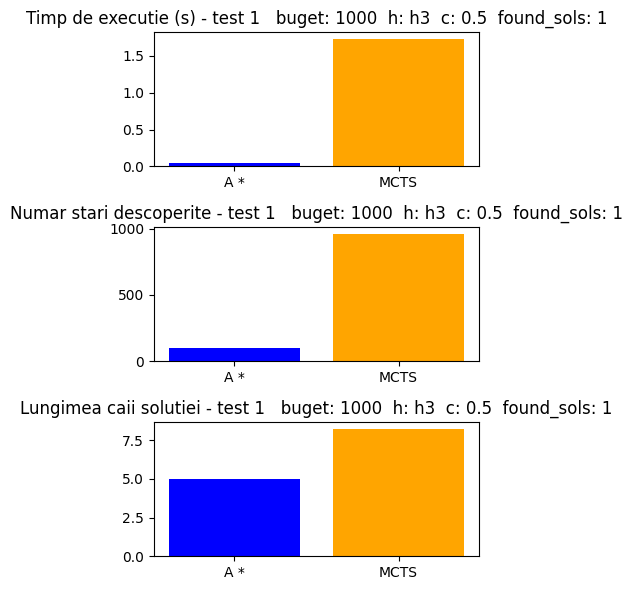

--- Testul 1 c: 0.5 h: h3 buget: 5000
avg_time: 9.213604402542114 found_sol: 0 unfound_sol: 20 avg_path_len: 10.65 avg_states_no: 5000.0
--- Testul 1 c: 0.1 h: h3 buget: 5000
avg_time: 10.72389464378357 found_sol: 0 unfound_sol: 20 avg_path_len: 20.35 avg_states_no: 5000.0
>>> best_c: 0.5 best_h <function h3 at 0x7f50ce471c60> best_time: 9.213604402542114 found_sol: 0 unfound_sol: 20 best_path_len: 10.65 best_states_no: 5000.0


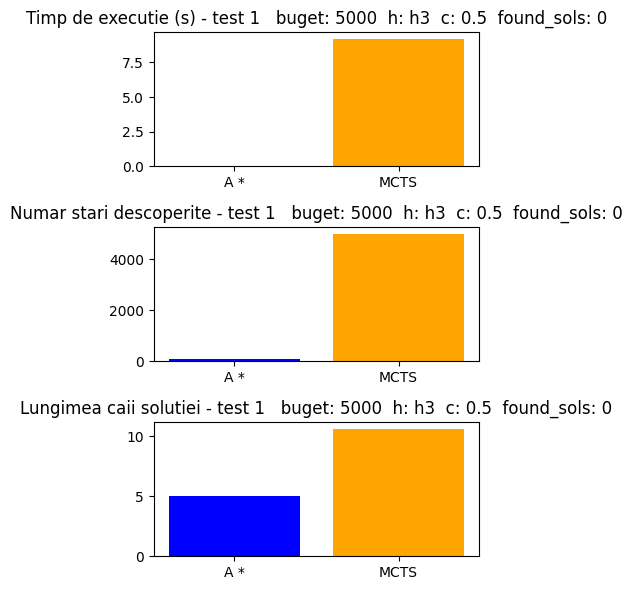

--- Testul 1 c: 0.5 h: h3 buget: 10000
avg_time: 19.036653554439546 found_sol: 0 unfound_sol: 20 avg_path_len: 12.45 avg_states_no: 10000.0
--- Testul 1 c: 0.1 h: h3 buget: 10000
avg_time: 23.015675210952757 found_sol: 0 unfound_sol: 20 avg_path_len: 24.05 avg_states_no: 10000.0
>>> best_c: 0.5 best_h <function h3 at 0x7f50ce471c60> best_time: 19.036653554439546 found_sol: 0 unfound_sol: 20 best_path_len: 12.45 best_states_no: 10000.0


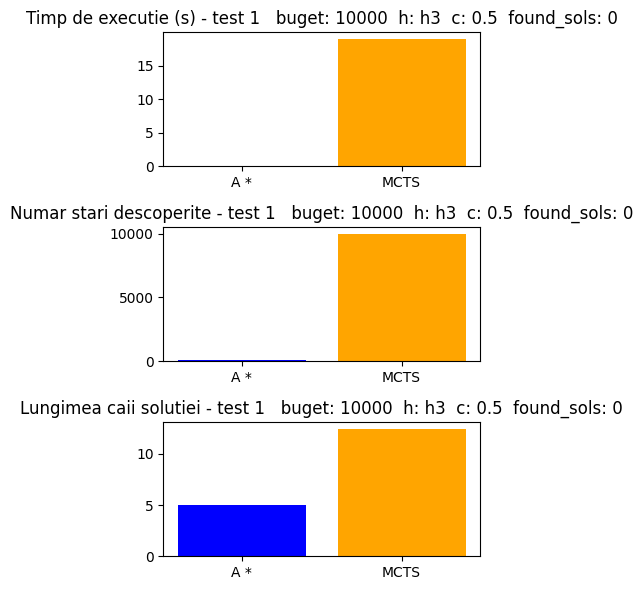

--- Testul 1 c: 0.5 h: h3 buget: 20000
avg_time: 38.65463328361511 found_sol: 0 unfound_sol: 20 avg_path_len: 13.2 avg_states_no: 20000.0
--- Testul 1 c: 0.1 h: h3 buget: 20000
avg_time: 50.353963899612424 found_sol: 0 unfound_sol: 20 avg_path_len: 29.95 avg_states_no: 20000.0
>>> best_c: 0.5 best_h <function h3 at 0x7f50ce471c60> best_time: 38.65463328361511 found_sol: 0 unfound_sol: 20 best_path_len: 13.2 best_states_no: 20000.0


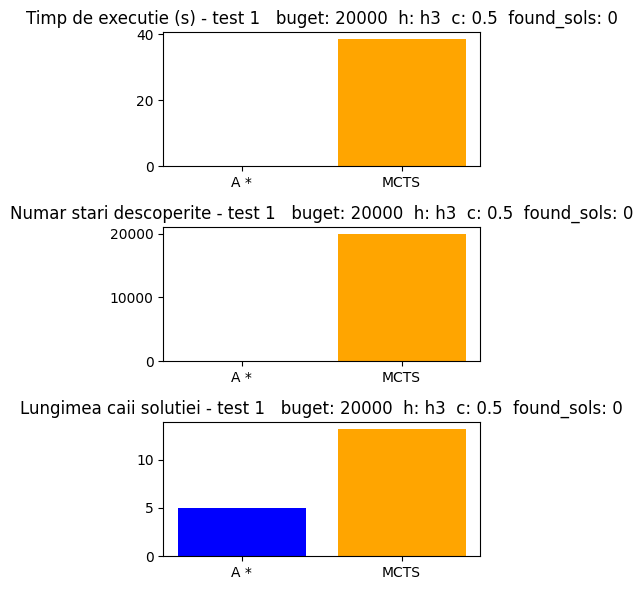

In [313]:
best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0
# Test 1
# buget 1000
get_best(0.5, h3, 1000, 1)
get_best(0.1, h3, 1000, 1)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test1_buget1_mcts_patterndb = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h]  
print_chart(1, "A *", "MCTS", test1_astar_patterndb, test1_buget1_mcts_patterndb, best_found_solutions, best_c, best_h, 1000)

best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# buget 5000
get_best(0.5, h3, 5000, 1)
get_best(0.1, h3, 5000, 1)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test1_buget2_mcts_patterndb = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h]  
print_chart(1, "A *", "MCTS", test1_astar_patterndb, test1_buget2_mcts_patterndb, best_found_solutions, best_c, best_h, 5000)

best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# buget 10000
get_best(0.5, h3, 10000, 1)
get_best(0.1, h3, 10000, 1)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test1_buget3_mcts_patterndb = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h]  
print_chart(1, "A *", "MCTS", test1_astar_patterndb, test1_buget3_mcts_patterndb, best_found_solutions, best_c, best_h, 10000)

best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# buget 20000
get_best(0.5, h3, 20000, 1)
get_best(0.1, h3, 20000, 1)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test1_buget4_mcts_patterndb = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h]  

print_chart(1, "A *", "MCTS", test1_astar_patterndb, test1_buget4_mcts_patterndb, best_found_solutions, best_c, best_h, 20000)


--- Testul 2 c: 0.5 h: h3 buget: 1000
avg_time: 1.6635584115982056 found_sol: 0 unfound_sol: 20 avg_path_len: 7.4 avg_states_no: 1000.0
--- Testul 2 c: 0.1 h: h3 buget: 1000
avg_time: 1.8107787489891052 found_sol: 0 unfound_sol: 20 avg_path_len: 12.75 avg_states_no: 1000.0
>>> best_c: 0.5 best_h <function h3 at 0x7f50c3b1c310> best_time: 1.6635584115982056 found_sol: 0 unfound_sol: 20 best_path_len: 7.4 best_states_no: 1000.0


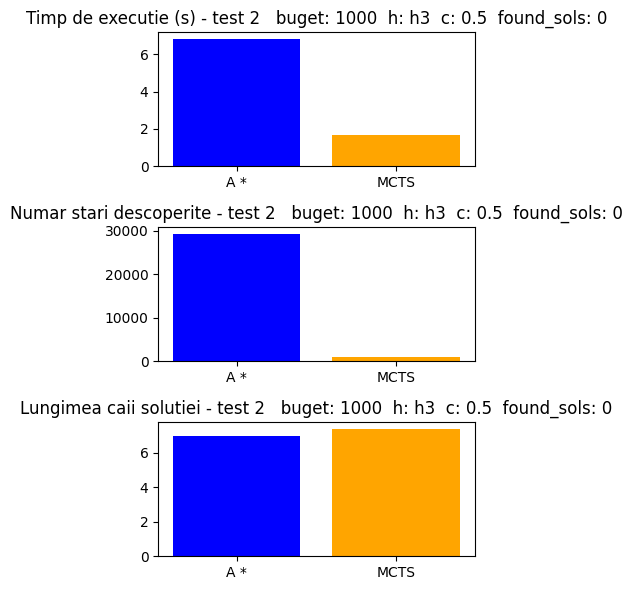

--- Testul 2 c: 0.5 h: h3 buget: 5000
avg_time: 9.067233192920686 found_sol: 0 unfound_sol: 20 avg_path_len: 9.9 avg_states_no: 5000.0
--- Testul 2 c: 0.1 h: h3 buget: 5000
avg_time: 10.443255412578583 found_sol: 0 unfound_sol: 20 avg_path_len: 19.7 avg_states_no: 5000.0
>>> best_c: 0.5 best_h <function h3 at 0x7f50c3b1c310> best_time: 9.067233192920686 found_sol: 0 unfound_sol: 20 best_path_len: 9.9 best_states_no: 5000.0


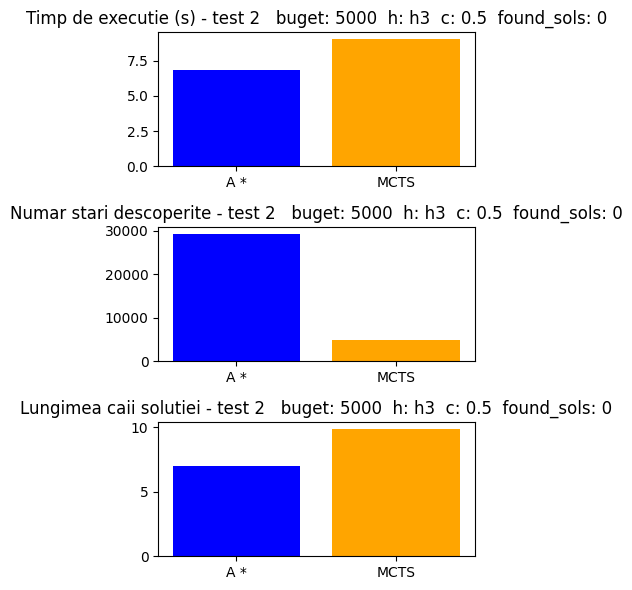

--- Testul 2 c: 0.5 h: h3 buget: 10000
avg_time: 18.485009825229646 found_sol: 0 unfound_sol: 20 avg_path_len: 11.15 avg_states_no: 10000.0
--- Testul 2 c: 0.1 h: h3 buget: 10000
avg_time: 22.51613723039627 found_sol: 0 unfound_sol: 20 avg_path_len: 22.5 avg_states_no: 10000.0
>>> best_c: 0.5 best_h <function h3 at 0x7f50c3b1c310> best_time: 18.485009825229646 found_sol: 0 unfound_sol: 20 best_path_len: 11.15 best_states_no: 10000.0


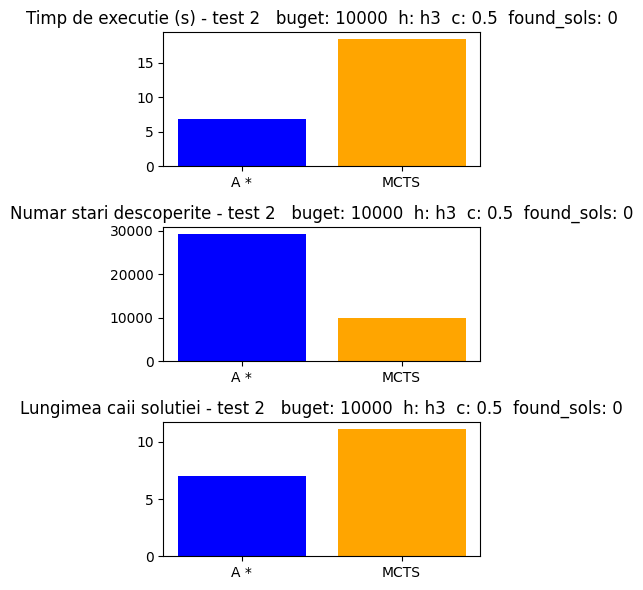

--- Testul 2 c: 0.5 h: h3 buget: 20000
avg_time: 37.35759356021881 found_sol: 0 unfound_sol: 20 avg_path_len: 12.6 avg_states_no: 20000.0
--- Testul 2 c: 0.1 h: h3 buget: 20000
avg_time: 48.442552053928374 found_sol: 0 unfound_sol: 20 avg_path_len: 27.65 avg_states_no: 20000.0
>>> best_c: 0.5 best_h <function h3 at 0x7f50c3b1c310> best_time: 37.35759356021881 found_sol: 0 unfound_sol: 20 best_path_len: 12.6 best_states_no: 20000.0


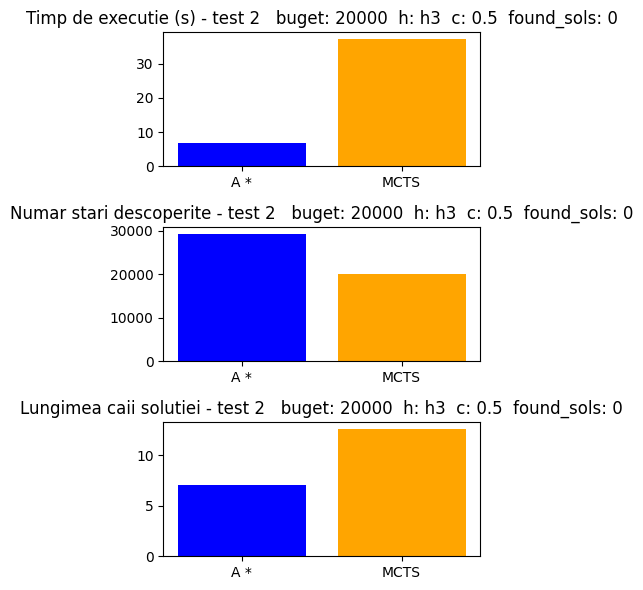

In [317]:
best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# Test 2
# buget 1000
get_best(0.5, h3, 1000, 2)
get_best(0.1, h3, 1000, 2)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test2_buget1_mcts_patterndb = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h] 
print_chart(2, "A *", "MCTS", test2_astar_patterndb, test2_buget1_mcts_patterndb, best_found_solutions, best_c, best_h, 1000)

best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# buget 5000
get_best(0.5, h3, 5000, 2)
get_best(0.1, h3, 5000, 2)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test2_buget2_mcts_patterndb = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h] 
print_chart(2, "A *", "MCTS", test2_astar_patterndb, test2_buget2_mcts_patterndb, best_found_solutions, best_c, best_h, 5000)

best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# buget 10000
get_best(0.5, h3, 10000, 2)
get_best(0.1, h3, 10000, 2)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test2_buget3_mcts_patterndb = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h] 
print_chart(2, "A *", "MCTS", test2_astar_patterndb, test2_buget3_mcts_patterndb, best_found_solutions, best_c, best_h, 10000)

best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# buget 20000
get_best(0.5, h3, 20000, 2)
get_best(0.1, h3, 20000, 2)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test2_buget4_mcts_patterndb = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h]  

print_chart(2, "A *", "MCTS", test2_astar_patterndb, test2_buget4_mcts_patterndb, best_found_solutions, best_c, best_h, 20000)


--- Testul 3 c: 0.5 h: h3 buget: 1000
avg_time: 1.6517395615577697 found_sol: 0 unfound_sol: 20 avg_path_len: 6.95 avg_states_no: 1000.0
--- Testul 3 c: 0.1 h: h3 buget: 1000
avg_time: 1.8037410974502563 found_sol: 0 unfound_sol: 20 avg_path_len: 11.75 avg_states_no: 1000.0
>>> best_c: 0.5 best_h <function h3 at 0x7f50c3b1c310> best_time: 1.6517395615577697 found_sol: 0 unfound_sol: 20 best_path_len: 6.95 best_states_no: 1000.0


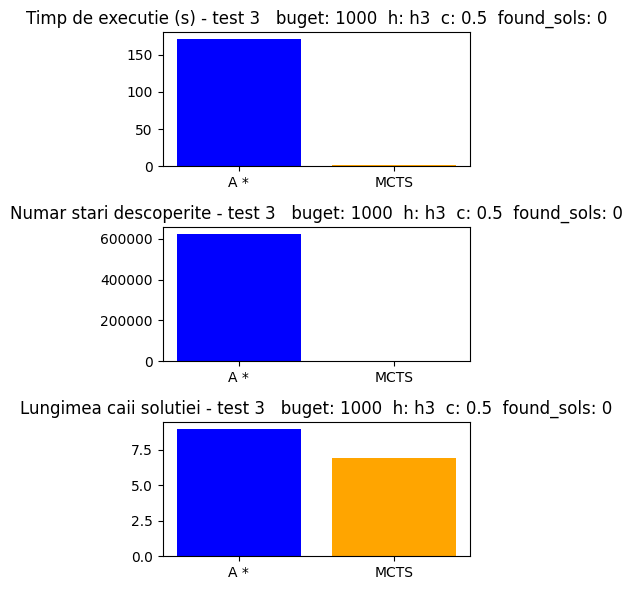

--- Testul 3 c: 0.5 h: h3 buget: 5000
avg_time: 8.70952104330063 found_sol: 0 unfound_sol: 20 avg_path_len: 9.1 avg_states_no: 5000.0
--- Testul 3 c: 0.1 h: h3 buget: 5000
avg_time: 10.255242049694061 found_sol: 0 unfound_sol: 20 avg_path_len: 18.3 avg_states_no: 5000.0
>>> best_c: 0.5 best_h <function h3 at 0x7f50c3b1c310> best_time: 8.70952104330063 found_sol: 0 unfound_sol: 20 best_path_len: 9.1 best_states_no: 5000.0


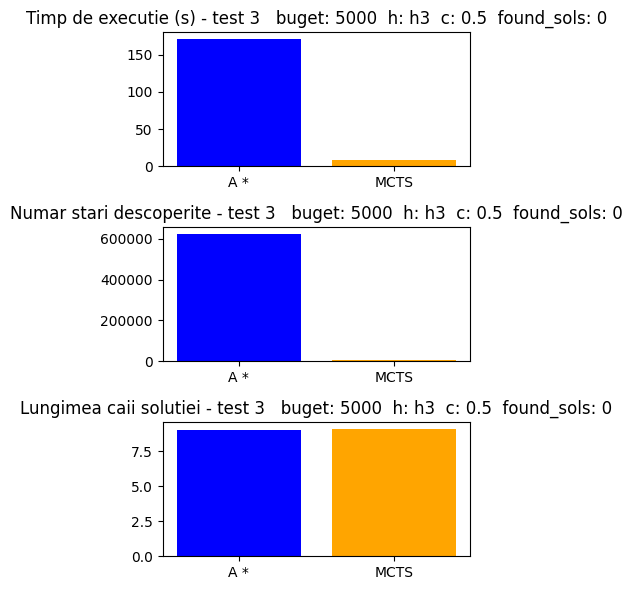

--- Testul 3 c: 0.5 h: h3 buget: 10000
avg_time: 17.89608519077301 found_sol: 0 unfound_sol: 20 avg_path_len: 9.95 avg_states_no: 10000.0
--- Testul 3 c: 0.1 h: h3 buget: 10000
avg_time: 21.792256140708922 found_sol: 0 unfound_sol: 20 avg_path_len: 21.65 avg_states_no: 10000.0
>>> best_c: 0.5 best_h <function h3 at 0x7f50c3b1c310> best_time: 17.89608519077301 found_sol: 0 unfound_sol: 20 best_path_len: 9.95 best_states_no: 10000.0


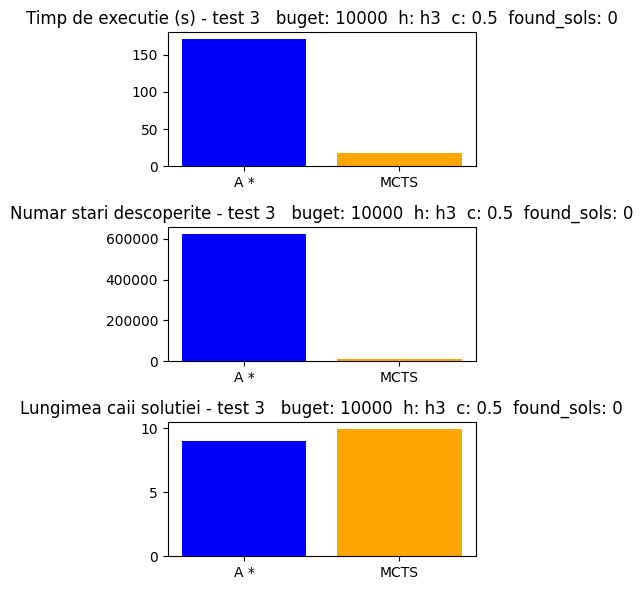

--- Testul 3 c: 0.5 h: h3 buget: 20000
avg_time: 36.556444597244266 found_sol: 0 unfound_sol: 20 avg_path_len: 11.0 avg_states_no: 20000.0
--- Testul 3 c: 0.1 h: h3 buget: 20000
avg_time: 47.29882097244263 found_sol: 0 unfound_sol: 20 avg_path_len: 26.15 avg_states_no: 20000.0
>>> best_c: 0.5 best_h <function h3 at 0x7f50c3b1c310> best_time: 36.556444597244266 found_sol: 0 unfound_sol: 20 best_path_len: 11.0 best_states_no: 20000.0


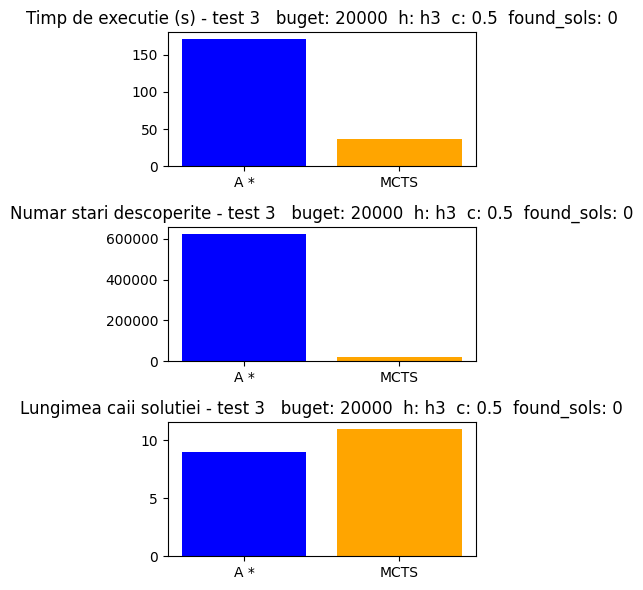

In [318]:
best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# Test 3
# buget 1000
get_best(0.5, h3, 1000, 3)
get_best(0.1, h3, 1000, 3)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test3_buget1_mcts_patterndb = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h] 
print_chart(3, "A *", "MCTS", test3_astar_patterndb, test3_buget1_mcts_patterndb, best_found_solutions, best_c, best_h, 1000)

best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# buget 5000
get_best(0.5, h3, 5000, 3)
get_best(0.1, h3, 5000, 3)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test3_buget2_mcts_patterndb = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h] 
print_chart(3, "A *", "MCTS", test3_astar_patterndb, test3_buget2_mcts_patterndb, best_found_solutions, best_c, best_h, 5000)

best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# buget 10000
get_best(0.5, h3, 10000, 3)
get_best(0.1, h3, 10000, 3)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test3_buget3_mcts_patterndb = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h] 
print_chart(3, "A *", "MCTS", test3_astar_patterndb, test3_buget3_mcts_patterndb, best_found_solutions, best_c, best_h, 10000)

best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# buget 20000
get_best(0.5, h3, 20000, 3)
get_best(0.1, h3, 20000, 3)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test3_buget4_mcts_patterndb = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h]  

print_chart(3, "A *", "MCTS", test3_astar_patterndb, test3_buget4_mcts_patterndb, best_found_solutions, best_c, best_h, 20000)


--- Testul 4 c: 0.5 h: h3 buget: 1000
avg_time: 1.6711644887924195 found_sol: 0 unfound_sol: 20 avg_path_len: 6.65 avg_states_no: 1000.0
--- Testul 4 c: 0.1 h: h3 buget: 1000
avg_time: 1.79156494140625 found_sol: 0 unfound_sol: 20 avg_path_len: 11.6 avg_states_no: 1000.0
>>> best_c: 0.5 best_h <function h3 at 0x7f50c3b1c310> best_time: 1.6711644887924195 found_sol: 0 unfound_sol: 20 best_path_len: 6.65 best_states_no: 1000.0


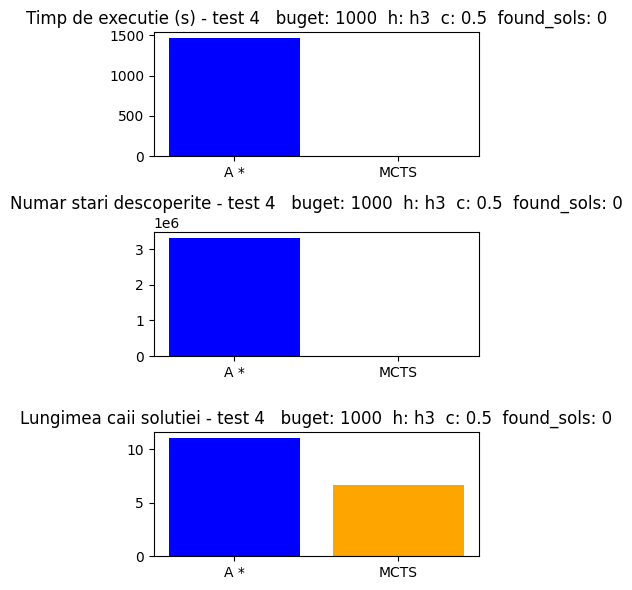

--- Testul 4 c: 0.5 h: h3 buget: 5000
avg_time: 8.569530296325684 found_sol: 0 unfound_sol: 20 avg_path_len: 8.3 avg_states_no: 5000.0
--- Testul 4 c: 0.1 h: h3 buget: 5000
avg_time: 10.04531376361847 found_sol: 0 unfound_sol: 20 avg_path_len: 17.8 avg_states_no: 5000.0
>>> best_c: 0.5 best_h <function h3 at 0x7f50c3b1c310> best_time: 8.569530296325684 found_sol: 0 unfound_sol: 20 best_path_len: 8.3 best_states_no: 5000.0


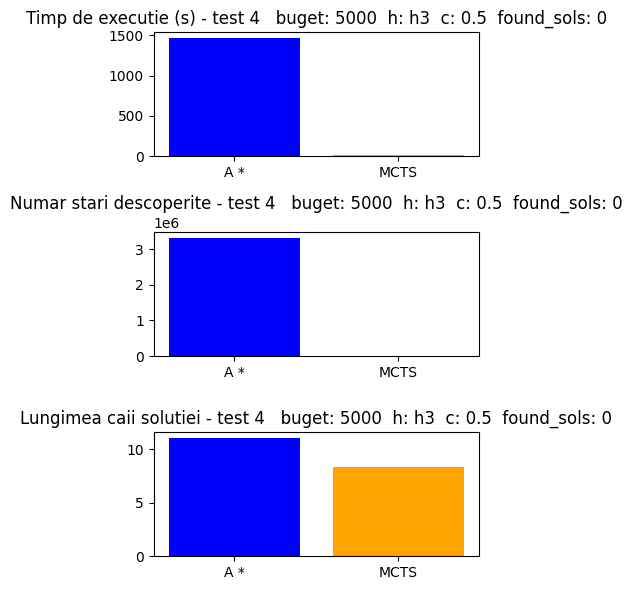

--- Testul 4 c: 0.5 h: h3 buget: 10000
avg_time: 17.56214725971222 found_sol: 0 unfound_sol: 20 avg_path_len: 9.3 avg_states_no: 10000.0
--- Testul 4 c: 0.1 h: h3 buget: 10000
avg_time: 21.62179567813873 found_sol: 0 unfound_sol: 20 avg_path_len: 20.7 avg_states_no: 10000.0
>>> best_c: 0.5 best_h <function h3 at 0x7f50c3b1c310> best_time: 17.56214725971222 found_sol: 0 unfound_sol: 20 best_path_len: 9.3 best_states_no: 10000.0


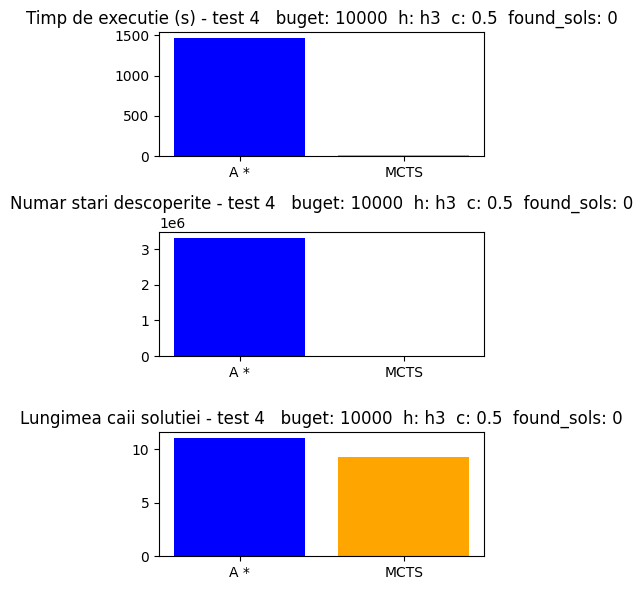

--- Testul 4 c: 0.5 h: h3 buget: 20000
avg_time: 35.66309057474136 found_sol: 0 unfound_sol: 20 avg_path_len: 9.9 avg_states_no: 20000.0
--- Testul 4 c: 0.1 h: h3 buget: 20000
avg_time: 47.15067253112793 found_sol: 0 unfound_sol: 20 avg_path_len: 27.45 avg_states_no: 20000.0
>>> best_c: 0.5 best_h <function h3 at 0x7f50c3b1c310> best_time: 35.66309057474136 found_sol: 0 unfound_sol: 20 best_path_len: 9.9 best_states_no: 20000.0


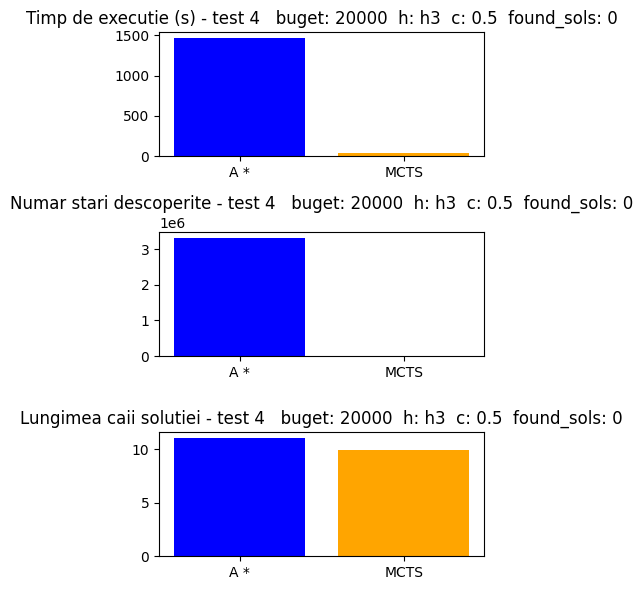

In [319]:
best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0
# Test 4
# buget 1000
get_best(0.5, h3, 1000, 4)
get_best(0.1, h3, 1000, 4)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test4_buget1_mcts_patterndb = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h]  
print_chart(4, "A *", "MCTS", test4_astar_patterndb, test4_buget1_mcts_patterndb, best_found_solutions, best_c, best_h, 1000)

best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# buget 5000
get_best(0.5, h3, 5000, 4)
get_best(0.1, h3, 5000, 4)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test4_buget2_mcts_patterndb = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h]  
print_chart(4, "A *", "MCTS", test4_astar_patterndb, test4_buget2_mcts_patterndb, best_found_solutions, best_c, best_h, 5000)

best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# buget 10000
get_best(0.5, h3, 10000, 4)
get_best(0.1, h3, 10000, 4)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test4_buget3_mcts_patterndb = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h]  
print_chart(4, "A *", "MCTS", test4_astar_patterndb, test4_buget3_mcts_patterndb, best_found_solutions, best_c, best_h, 10000)

best_found_solutions = -1
best_c = -1
best_h = -1
best_time = -1
best_path = -1
best_states_no = -1

avg_found_solutions = 0
avg_time = 0
avg_path = 0
avg_states_no = 0

# buget 20000
get_best(0.5, h3, 20000, 4)
get_best(0.1, h3, 20000, 4)
print(f">>> best_c: {best_c} best_h {best_h} best_time: {best_time} found_sol: {best_found_solutions} unfound_sol: {20 - best_found_solutions} best_path_len: {best_path} best_states_no: {best_states_no}")
test4_buget4_mcts_patterndb = [best_time, best_path, best_states_no, best_found_solutions, best_c, best_h]  

print_chart(4, "A *", "MCTS", test4_astar_patterndb, test4_buget4_mcts_patterndb, best_found_solutions, best_c, best_h, 20000)
